## **Supply and demand analysis of the labour market in the Data environment: Global wages and conditions**.

   
**Data sources**:
- LinkedIn API for job vacancy data.
 
- Kaggle or Glassdoor for data on Data Scientists profiles.

**Summary**:

- **Hypothesis**: 'The United States is the best country to work in the data environment'

- **Questions to answer**:   

    - Are there specific regions of the world where Data Scientists have better salaries and working conditions compared to others?   

- **Objective**: To identify the regions of the world that offer the best salaries and working conditions for data environment employees.

- **EDA**:
    - Obtain data on job offers available through APIs such as LinkedIn.
    
    - Collect data on Data Scientist profiles and skills from Kaggle or Glassdoor.
    - Analyse the geographical distribution of job offers and data environment professionals.
    - Compare salaries offered in different regions and sectors.
    - Visualise trends in salary and working conditions for data environment globally.
- Potential for ML:
    - Forecasting: Predict the evolution of salaries and working conditions for data environment in different parts of the world.   
    
    - Ranking models: Develop models to rank regions according to competitive pay and working conditions for data environment.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import display_functions as dpf

import plotly.express as px
import folium
import json
import requests
import folium
from folium.plugins import MarkerCluster

from scipy import stats
from scipy.stats import chi2_contingency

import importlib
importlib.reload(dpf)

import warnings
warnings.filterwarnings('ignore');

# 1. First part

In [89]:
# Loads the DataFrames we are going to work with.
df1 = pd.read_csv("../data/1_DataScience_salaries_2024.csv")
df2 = pd.read_csv("../data/2_ds_salaries.csv")
df3 = pd.read_csv("../data/3_jobs_in_data.csv")

# Configures pandas to display all columns
pd.set_option('display.max_columns', None)

## 1.1. Data cleansing

### 1.1. Visualisation of the 3 datasets

##### DF1

In [90]:
print(df1.info()) # Shows if there are nulls and the type of data in each column
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


##### DF2

In [91]:
print(df2.info()) # Shows if there are nulls and the type of data in each column
df2.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


##### DF3

In [92]:
print(df3.info()) # Shows if there are nulls and the type of data in each column
df3.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
None


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### 1.2. DataFrames adaptation

Before unifying, I make some modifications to the DataFrames to avoid having NaNs when I put them together.

First of all, I think about the columns I am interested in and edit each DataFrame to keep that data and match the name of the columns and the type of representation of each one in the 3 datasets.

#### DF1

In [93]:
# Modify the columns that I think are convenient for a better understanding.

# Edit column 'experience_level'
df1['experience_level'] = df1['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_1(level): # Function to edit the column 'experience_level'.
    if level == 'EN':
        return 'Junior'
    elif level == 'MI':
        return 'Intermediate'
    elif level == 'SE':
        return 'Senior'
    return 'Expert'

df1['experience_level'] = df1['experience_level'].apply(cat_experience_level_1) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df1['employment_type'] = df1['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_employment_type(type): # Function to edit the column 'employment_type'
    if type == 'FT':
        return 'Full-time'
    elif type == 'PT':
        return 'Part-time'
    elif type == 'CT':
        return 'Contract'
    return 'Freelance'

df1['employment_type'] = df1['employment_type'].apply(cat_employment_type) # Modification of the column 'employment_type'


# Edit column 'remote_ratio'
def cat_remote_ratio(ratio): # Function to edit the column 'remote_ratio'
    if ratio == 0:
        return 'In-person'
    elif ratio == 50:
        return 'Hybrid'
    return 'Remote'

df1['remote_ratio'] = df1['remote_ratio'].apply(cat_remote_ratio) # Modification of the column 'remote_ratio'
df1['work_setting'] = df1['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df1.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [94]:
df1.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_setting
0,2021,Intermediate,Full-time,Data Scientist,30400000,CLP,40038,CL,CL,L,Remote
1,2021,Intermediate,Full-time,BI Data Analyst,11000000,HUF,36259,HU,US,L,Hybrid
2,2020,Intermediate,Full-time,Data Scientist,11000000,HUF,35735,HU,HU,L,Hybrid
3,2021,Intermediate,Full-time,ML Engineer,8500000,JPY,77364,JP,JP,S,Hybrid
4,2022,Senior,Full-time,Lead Machine Learning Engineer,7500000,INR,95386,IN,IN,L,Hybrid


#### DF2

In [95]:
# Edit column 'experience_level'
df2['experience_level'] = df2['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['experience_level'] = df2['experience_level'].apply(cat_experience_level_1)

# Edit column 'employment_type'
df2['employment_type'] = df2['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end
df2['employment_type'] = df2['employment_type'].apply(cat_employment_type)

# Edit column 'remote_ratio'
df2['remote_ratio'] = df2['remote_ratio'].apply(cat_remote_ratio)
df2['work_setting'] = df2['remote_ratio'] # Creation of a column equivalent to 'work_setting' with the name we want to use
df2.drop(columns = 'remote_ratio', inplace = True) # Removal of the old column

In [96]:
df2.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_setting
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,ES,L,Remote
1,2023,Intermediate,Contract,ML Engineer,30000,USD,30000,US,US,S,Remote
2,2023,Intermediate,Contract,ML Engineer,25500,USD,25500,US,US,S,Remote
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,CA,M,Remote
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,CA,M,Remote


#### DF3

In [97]:
df3.experience_level.value_counts()

experience_level
Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: count, dtype: int64

In [98]:
df3.employment_type.value_counts()

employment_type
Full-time    9310
Contract       19
Part-time      15
Freelance      11
Name: count, dtype: int64

In [99]:
# Edit column 'experience_level'
df3['experience_level'] = df3['experience_level'].str.strip() # Removes any blank spaces at the beginning or at the end

def cat_experience_level_2(level): # Function to edit the column 'experience_level'
    if level == 'Entry-level':
        return 'Junior'
    elif level == 'Mid-level':
        return 'Intermediate'
    elif level == 'Executive':
        return 'Expert'
    return 'Senior'

df3['experience_level'] = df3['experience_level'].apply(cat_experience_level_2) # Modification of the column 'experience_level'


# Edit column 'employment_type'
df3['employment_type'] = df3['employment_type'].str.strip() # Removes any blank spaces at the beginning or at the end

In [100]:
df3.head(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Intermediate,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


### 1.3. DataFrames unification

In [101]:
# Join datasets
df_combined = pd.concat([df1, df2, df3], ignore_index = True)
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27948 entries, 0 to 27947
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           27948 non-null  int64 
 1   experience_level    27948 non-null  object
 2   employment_type     27948 non-null  object
 3   job_title           27948 non-null  object
 4   salary              27948 non-null  int64 
 5   salary_currency     27948 non-null  object
 6   salary_in_usd       27948 non-null  int64 
 7   employee_residence  27948 non-null  object
 8   company_location    27948 non-null  object
 9   company_size        27948 non-null  object
 10  work_setting        27948 non-null  object
 11  job_category        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 2.6+ MB


In [102]:
# Arrange the columns in the order I think is appropriate
new_order = ['job_title', 'job_category', 'experience_level', 'salary', 'salary_currency', 'salary_in_usd', 'company_location', 'employee_residence',
             'work_setting', 'employment_type', 'company_size', 'work_year']

# Rearrange the columns
df_combined = df_combined[new_order]

df_combined

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,NaN,Intermediate,30400000,CLP,40038,CL,CL,Remote,Full-time,L,2021
1,BI Data Analyst,NaN,Intermediate,11000000,HUF,36259,US,HU,Hybrid,Full-time,L,2021
2,Data Scientist,NaN,Intermediate,11000000,HUF,35735,HU,HU,Hybrid,Full-time,L,2020
3,ML Engineer,NaN,Intermediate,8500000,JPY,77364,JP,JP,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,NaN,Senior,7500000,INR,95386,IN,IN,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27943,Data Specialist,Data Management and Strategy,Senior,165000,USD,165000,United States,United States,Remote,Full-time,L,2021
27944,Data Scientist,Data Science and Research,Senior,412000,USD,412000,United States,United States,Remote,Full-time,L,2020
27945,Principal Data Scientist,Data Science and Research,Intermediate,151000,USD,151000,United States,United States,Remote,Full-time,L,2021
27946,Data Scientist,Data Science and Research,Junior,105000,USD,105000,United States,United States,Remote,Full-time,S,2020


In [103]:
# Modification of the columns 'company_location' and 'employee_residence'
set_company_location = set(df_combined.company_location.to_list())
set_employee_residence = set(df_combined.employee_residence.to_list())

# Join the sets to obtain all unique items
set_combined = set_company_location.union(set_employee_residence)

print(set_combined)

{'ID', 'Nigeria', 'Iran', 'Czech Republic', 'Poland', 'Malaysia', 'Costa Rica', 'MD', 'UG', 'Kenya', 'Thailand', 'MK', 'ZA', 'JP', 'QA', 'Bolivia', 'KW', 'BE', 'IR', 'DK', 'Croatia', 'DE', 'AT', 'TN', 'Netherlands', 'PL', 'IN', 'American Samoa', 'HK', 'Argentina', 'Denmark', 'GR', 'AM', 'BO', 'NO', 'Australia', 'Israel', 'Iraq', 'SA', 'Uzbekistan', 'Jersey', 'DZ', 'KE', 'Vietnam', 'RU', 'BA', 'CO', 'South Korea', 'Armenia', 'HU', 'LT', 'Honduras', 'NZ', 'Canada', 'South Africa', 'Switzerland', 'PE', 'Italy', 'United Arab Emirates', 'RS', 'Latvia', 'IQ', 'UA', 'Indonesia', 'LU', 'BG', 'MY', 'IE', 'AR', 'Turkey', 'MA', 'FR', 'India', 'France', 'LV', 'CF', 'Egypt', 'IT', 'GE', 'MT', 'US', 'Ecuador', 'Bulgaria', 'CA', 'GH', 'ES', 'CL', 'CN', 'Ukraine', 'PR', 'Dominican Republic', 'SI', 'Bahamas', 'Sweden', 'TR', 'AD', 'Russia', 'CH', 'Qatar', 'Andorra', 'Japan', 'Gibraltar', 'Algeria', 'JE', 'Singapore', 'Central African Republic', 'Chile', 'BR', 'KR', 'Spain', 'MX', 'Estonia', 'Slovenia',

In [104]:
# Me quedo solo con los países que están reflejados con su diminutivo (dos caracteres)
diminutives = {country for country in set_combined if len(country) == 2}
diminutives

{'AD',
 'AE',
 'AL',
 'AM',
 'AR',
 'AS',
 'AT',
 'AU',
 'BA',
 'BE',
 'BG',
 'BO',
 'BR',
 'BS',
 'CA',
 'CF',
 'CH',
 'CL',
 'CN',
 'CO',
 'CR',
 'CY',
 'CZ',
 'DE',
 'DK',
 'DO',
 'DZ',
 'EC',
 'EE',
 'EG',
 'ES',
 'FI',
 'FR',
 'GB',
 'GE',
 'GH',
 'GI',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'ID',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'KR',
 'KW',
 'LB',
 'LT',
 'LU',
 'LV',
 'MA',
 'MD',
 'MK',
 'MT',
 'MU',
 'MX',
 'MY',
 'NG',
 'NL',
 'NO',
 'NZ',
 'OM',
 'PE',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'QA',
 'RO',
 'RS',
 'RU',
 'SA',
 'SE',
 'SG',
 'SI',
 'SK',
 'TH',
 'TN',
 'TR',
 'UA',
 'UG',
 'US',
 'UZ',
 'VN',
 'ZA'}

In [105]:
country_mapping = {
    'AD': 'Andorra',
    'AE': 'United Arab Emirates',
    'AL': 'Albania',
    'AM': 'Armenia',
    'AR': 'Argentina',
    'AS': 'American Samoa',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BS': 'Bahamas',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CR': 'Costa Rica',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'DZ': 'Algeria',
    'EC': 'Ecuador',
    'EE': 'Estonia',
    'EG': 'Egypt',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GE': 'Georgia',
    'GH': 'Ghana',
    'GI': 'Gibraltar',
    'GR': 'Greece',
    'HK': 'Hong Kong',
    'HN': 'Honduras',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IQ': 'Iraq',
    'IR': 'Iran',
    'IT': 'Italy',
    'JE': 'Jersey',
    'JP': 'Japan',
    'KE': 'Kenya',
    'KR': 'South Korea',
    'KW': 'Kuwait',
    'LB': 'Lebanon',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MA': 'Morocco',
    'MD': 'Moldova',
    'MK': 'North Macedonia',
    'MT': 'Malta',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NG': 'Nigeria',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'NZ': 'New Zealand',
    'OM': 'Oman',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PK': 'Pakistan',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'QA': 'Qatar',
    'RO': 'Romania',
    'RS': 'Serbia',
    'RU': 'Russia',
    'SA': 'Saudi Arabia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'TH': 'Thailand',
    'TN': 'Tunisia',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'UG': 'Uganda',
    'US': 'United States',
    'UZ': 'Uzbekistan',
    'VN': 'Vietnam',
    'ZA': 'South Africa'
}


df_combined['company_location'] = df_combined['company_location'].replace(country_mapping)
df_combined['employee_residence'] = df_combined['employee_residence'].replace(country_mapping)
df_combined.head(5)

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,NaN,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,NaN,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,NaN,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,NaN,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,NaN,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022


In [106]:
set(df_combined.job_title.to_list())

{'3D Computer Vision Researcher',
 'AI Architect',
 'AI Developer',
 'AI Engineer',
 'AI Product Manager',
 'AI Programmer',
 'AI Research Engineer',
 'AI Research Scientist',
 'AI Scientist',
 'AI Software Engineer',
 'AWS Data Architect',
 'Admin & Data Analyst',
 'Analytics Engineer',
 'Analytics Engineering Manager',
 'Applied Data Scientist',
 'Applied Machine Learning Engineer',
 'Applied Machine Learning Scientist',
 'Applied Research Scientist',
 'Applied Scientist',
 'Autonomous Vehicle Technician',
 'Azure Data Engineer',
 'BI Analyst',
 'BI Data Analyst',
 'BI Data Engineer',
 'BI Developer',
 'Big Data Architect',
 'Big Data Developer',
 'Big Data Engineer',
 'Business Data Analyst',
 'Business Intelligence',
 'Business Intelligence Analyst',
 'Business Intelligence Data Analyst',
 'Business Intelligence Developer',
 'Business Intelligence Engineer',
 'Business Intelligence Lead',
 'Business Intelligence Manager',
 'Business Intelligence Specialist',
 'CRM Data Analyst',
 '

In [107]:
df_combined.job_category.value_counts()

job_category
Data Science and Research         3014
Data Engineering                  2260
Data Analysis                     1457
Machine Learning and AI           1428
Leadership and Management          503
BI and Visualization               313
Data Architecture and Modeling     259
Data Management and Strategy        61
Data Quality and Operations         55
Cloud and Database                   5
Name: count, dtype: int64

In [108]:
# Remove the NaNs from the column ‘job_category’ and give it the value that corresponds to it

# Importing the library needed to use regular expressions
import re

def classify_job_title(title): # Sort 'job_category' according to the column 'job_title'
    
    title = title.lower() # Convert title to lowercase to make search case insensitive
    
    # Specific categories based on title patterns
    if re.search(r'\bdata scientist\b|\bdata science\b|\bresearch\b', title):
        return 'Data Science and Research'
    elif re.search(r'\bmachine learning\b|\bml\b|\bai\b|\bdeep learning\b', title):
        return 'Machine Learning and AI'
    elif re.search(r'\bbi\b|\bvisualization\b|\breporting\b|\bpower bi\b', title):
        return 'BI and Visualization'
    elif re.search(r'\bdata engineer\b|\bengineer\b|\bengineering\b|\bdata platform\b', title):
        return 'Data Engineering'
    elif re.search(r'\bdata analysis\b|\bdata analyst\b|\banalyst\b|\banalyst\b|\banalysis\b', title):
        return 'Data Analysis'
    elif re.search(r'\bcloud\b|\bdatabase\b|\bdevops\b|\baws\b|\bazure\b', title):
        return 'Cloud and Database'
    elif re.search(r'\bleadership\b|\bmanager\b|\bmanagement\b|\bdirector\b', title):
        return 'Leadership and Management'
    elif re.search(r'\bdata quality\b|\boperations\b|\bdata governance\b', title):
        return 'Data Quality and Operations'
    elif re.search(r'\bdata architecture\b||\bdata architect\b\bmodeling\b|\bdata modeller\b', title):
        return 'Data Architecture and Modeling'
    elif re.search(r'\bstrategy\b|\bdata management\b|\bdata strategy\b', title):
        return 'Data Management and Strategy'
    else:
        return 'Unknown'  # Default category if it does not match any

# Applies the function to fill the NaNs in job_category
df_combined['job_category'] = df_combined.apply(lambda row: classify_job_title(row['job_title']) if pd.isna(row['job_category']) else row['job_category'], axis = 1)

df_combined


,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,Data Science and Research,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,BI and Visualization,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,Data Science and Research,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,Machine Learning and AI,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,Machine Learning and AI,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27943,Data Specialist,Data Management and Strategy,Senior,165000,USD,165000,United States,United States,Remote,Full-time,L,2021
27944,Data Scientist,Data Science and Research,Senior,412000,USD,412000,United States,United States,Remote,Full-time,L,2020
27945,Principal Data Scientist,Data Science and Research,Intermediate,151000,USD,151000,United States,United States,Remote,Full-time,L,2021
27946,Data Scientist,Data Science and Research,Junior,105000,USD,105000,United States,United States,Remote,Full-time,S,2020


In [109]:
# Check for duplicate rows
duplicates = sum(df_combined.duplicated())
print(f'There are {duplicates} duplicate rows')

There are 17981 duplicate rows


In [110]:
# Remove duplicate rows
df_combined.drop_duplicates(inplace = True)

In [111]:
# Verify that there are no more nulls and how the DataFrame looks like after cleaning it.
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9967 entries, 0 to 27943
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           9967 non-null   object
 1   job_category        9967 non-null   object
 2   experience_level    9967 non-null   object
 3   salary              9967 non-null   int64 
 4   salary_currency     9967 non-null   object
 5   salary_in_usd       9967 non-null   int64 
 6   company_location    9967 non-null   object
 7   employee_residence  9967 non-null   object
 8   work_setting        9967 non-null   object
 9   employment_type     9967 non-null   object
 10  company_size        9967 non-null   object
 11  work_year           9967 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 1012.3+ KB


In [112]:
df_combined

,job_title,job_category,experience_level,salary,salary_currency,salary_in_usd,company_location,employee_residence,work_setting,employment_type,company_size,work_year
0,Data Scientist,Data Science and Research,Intermediate,30400000,CLP,40038,Chile,Chile,Remote,Full-time,L,2021
1,BI Data Analyst,BI and Visualization,Intermediate,11000000,HUF,36259,United States,Hungary,Hybrid,Full-time,L,2021
2,Data Scientist,Data Science and Research,Intermediate,11000000,HUF,35735,Hungary,Hungary,Hybrid,Full-time,L,2020
3,ML Engineer,Machine Learning and AI,Intermediate,8500000,JPY,77364,Japan,Japan,Hybrid,Full-time,S,2021
4,Lead Machine Learning Engineer,Machine Learning and AI,Senior,7500000,INR,95386,India,India,Hybrid,Full-time,L,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
27888,Computer Vision Engineer,Machine Learning and AI,Junior,180000,DKK,28609,Denmark,Denmark,Hybrid,Part-time,S,2021
27891,BI Data Analyst,Data Analysis,Intermediate,98000,USD,98000,United States,United States,In-person,Full-time,M,2020
27918,Computer Vision Engineer,Machine Learning and AI,Senior,60000,USD,60000,United States,Russia,Remote,Freelance,S,2020
27920,Computer Vision Engineer,Machine Learning and AI,Senior,102000,BRL,18907,Brazil,Brazil,In-person,Full-time,M,2021


In [113]:
df_combined.groupby(['job_category', 'job_title']).count()

experience_level  \
job_category            job_title                                               
BI and Visualization    BI Analyst                                         36   
                        BI Data Analyst                                    23   
                        BI Data Engineer                                    1   
                        BI Developer                                       57   
                        Business Intelligence Analyst                      50   
...                                                                       ...   
Machine Learning and AI Machine Learning Software Engineer                 16   
                        Machine Learning Specialist                         2   
                        NLP Engineer                                       12   
                        Principal Machine Learning Engineer                 3   
                        Staff Machine Learning Engineer                     1   

                                                             salary  \
job_category            job_title                                     
BI and Visualization    BI Analyst                               36   
                        BI Data Analyst                          23   
                        BI Data Engineer                          1   
                        BI Developer                             57   
                        Business Intelligence Analyst            50   
...                                                             ...   
Machine Learning and AI Machine Learning Software Engineer       16   
                        Machine Learning Specialist               2   
                        NLP Engineer                             12   
                        Principal Machine Learning Engineer       3   
                        Staff Machine Learning Engineer           1   

                                                             salary_currency  \
job_category            job_title                                              
BI and Visualization    BI Analyst                                        36   
                        BI Data Analyst                                   23   
                        BI Data Engineer                                   1   
                        BI Developer                                      57   
                        Business Intelligence Analyst                     50   
...                                                                      ...   
Machine Learning and AI Machine Learning Software Engineer                16   
                        Machine Learning Specialist                        2   
                        NLP Engineer                                      12   
                        Principal Machine Learning Engineer                3   
                        Staff Machine Learning Engineer                    1   

                                                             salary_in_usd  \
job_category            job_title                                            
BI and Visualization    BI Analyst                                      36   
                        BI Data Analyst                                 23   
                        BI Data Engineer                                 1   
                        BI Developer                                    57   
                        Business Intelligence Analyst                   50   
...                                                                    ...   
Machine Learning and AI Machine Learning Software Engineer              16   
                        Machine Learning Specialist                      2   
                        NLP Engineer                                    12   
                        Principal Machine Learning Engineer              3   
                        Staff Machine Learning Engineer                  1   

                           

In [114]:
df_combined.to_csv('../data/data_jobs.csv', sep = ',', index = False, encoding = 'utf-8')

## 1.2. Data analysis

### 1.2.1. Description of what each column of the dataset represents:

- *job_title*: Title of the job or position of the employee.    
Example: Data Scientist, Machine Learning Engineer...

- *job_category*: Job category.   
Example: Data Science and Research, Data Management and Strategy...

- *experience_level*: Level of experience of the employee.   
Example: Junior, Senior...

- *salary*: Gross salary of the employee, without currency conversions.

- *salary_currency*: Currency in which the salary is paid.
Example: USD (US Dollar), EUR (Euro), GBP (Pound Sterling)...

- *salary_in_usd*: Salary converted to US dollars (USD) for easy comparison.

- *company_location*: Country where the company's headquarters are located.
Example: US (United States), ES (Spain)...

- *employee_residence*: Country of residence of the employee.
Example: US (United States), ES (Spain)...

- *work_setting*: Proportion of work that is done remotely.   
It is coded as follows:
    - In-person: No remote work.
    - Hybrid: Partial remote work.
    - Remote: Full remote work.

- *employment_type*: Type of employment, indicating whether it is full-time, part-time, etc.    
Example: Full-time, Part-time...

- *company_size*: Company size, usually indicated by the number of employees.
The categories are as follows:
    - S: Small - 1 to 50 employees.
    - M: Medium - 51 to 250 employees.
    - L: Large - Over 250 employees.

- *work_year*: Year in which the work was performed or the registered wage was earned.

### 1.2.2. Univariate analysis

In [115]:
df_typification = pd.DataFrame([df_combined.nunique(), df_combined.nunique()/len(df_combined) * 100, df_combined.dtypes]).T.rename(columns = {0: "Card", 1: "%_Card", 2: "Type"})
df_typification

,Card,%_Card,Type
job_title,155,1.555132,object
job_category,10,0.100331,object
experience_level,4,0.040132,object
salary,2380,23.8788,int64
salary_currency,24,0.240795,object
salary_in_usd,2843,28.52413,int64
company_location,83,0.832748,object
employee_residence,91,0.913013,object
work_setting,3,0.030099,object
employment_type,4,0.040132,object


In [116]:
cat_cols = [
    'job_title',
    'job_category',
    'experience_level',
    'salary_currency',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

df_combined[cat_cols].mode().T # Get the most common type of job offer.

,0
job_title,Data Engineer
job_category,Data Science and Research
experience_level,Senior
salary_currency,USD
company_location,United States
employee_residence,United States
work_setting,In-person
employment_type,Full-time
company_size,M
work_year,2023


In [117]:
df_combined.salary_in_usd.describe().round(2)

count      9967.00
mean     145113.26
std       73443.39
min        5132.00
25%       93850.00
50%      137000.00
75%      185000.00
max      800000.00
Name: salary_in_usd, dtype: float64

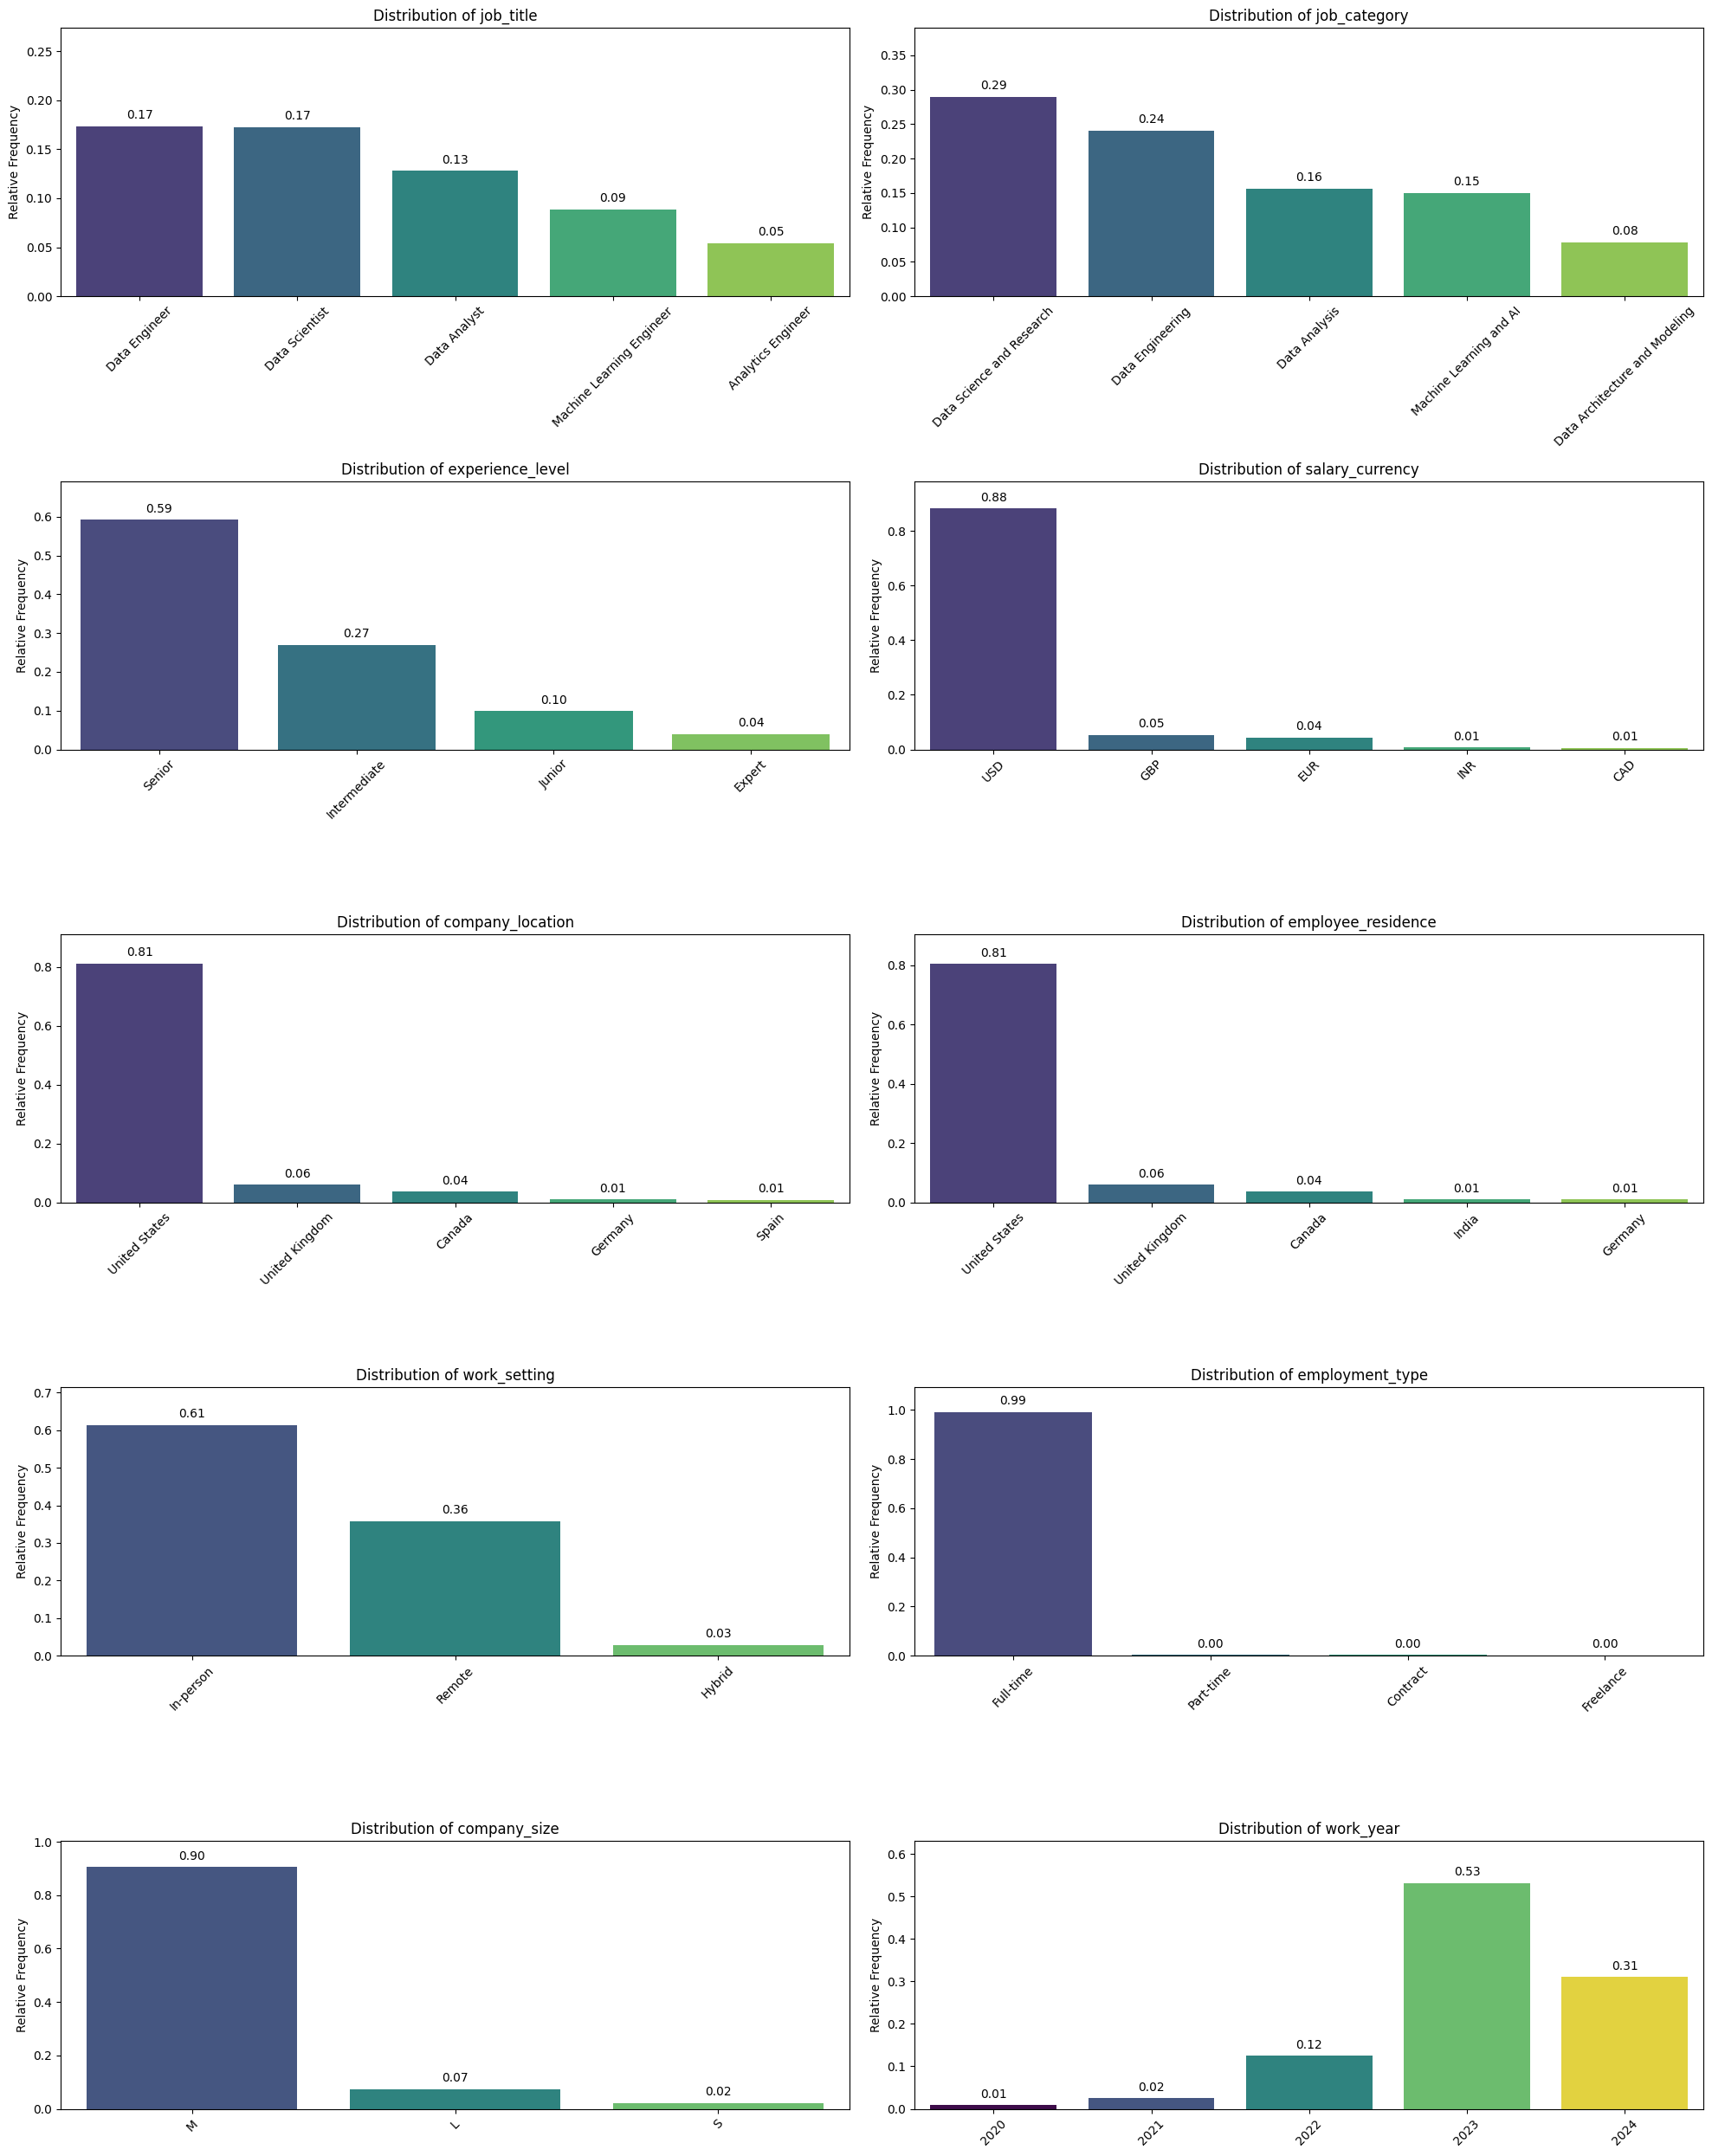

In [118]:
dpf.plot_categorical_distribution(df_combined, cat_cols, relative = True, show_values = True, limit = 5)

<font color='yellow'>

- The most in-demand profiles are **Data Engineers and Data Scientists with at least 5 years' experience** (Senior category).

- The country with the most job offers for the data environment is the **United States** (more than 80% of the job offers).

- The work is usually carried out **full-time and on-site**, followed by remote work, and leaving aside the hybrid method.

- The companies that most demand this profile of employees are **medium-sized (50 to 250 employees)** (90% of the offer are from medium-sized companies).

- The demand for this type of job has been growing exponentially since 2020. **Could events such as covid or the collapse of the Sillicon Valley Bank in 2023 have had something to do with this?**

</font>

(2,)


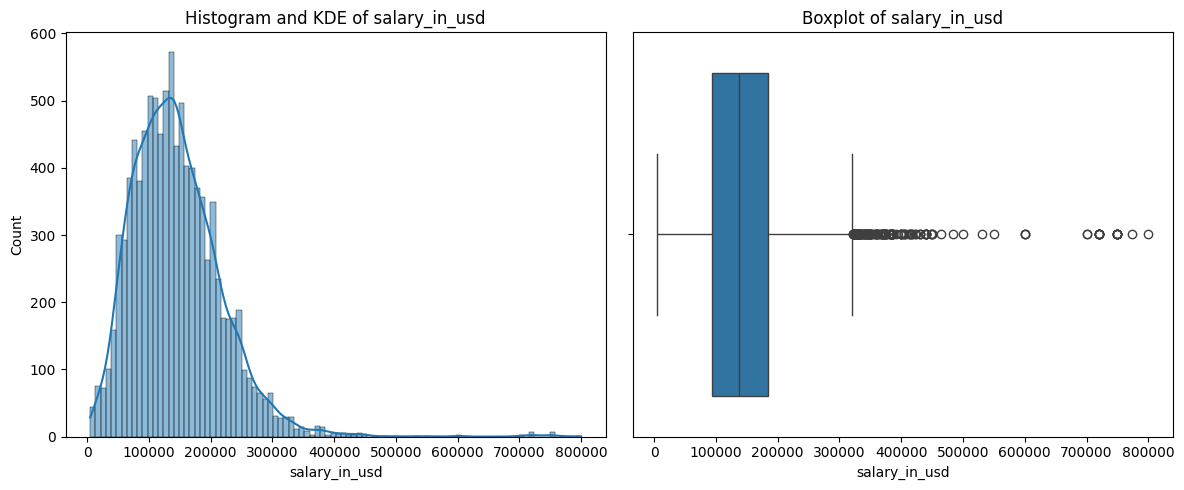

In [119]:
dpf.plot_combined_graphs(df_combined, ['salary_in_usd'])

##### - Treatment of outliers using the Winsorisation method 

In [120]:
from scipy.stats import mstats

# Define Winsorization limits
limits = [0.0, 0.02]  # 0% lower, as there are no outliers below and 2% higher.

# Apply Winsorization
df_combined['salary_in_usd_w'] = mstats.winsorize(df_combined['salary_in_usd'], limits = limits)

(2,)


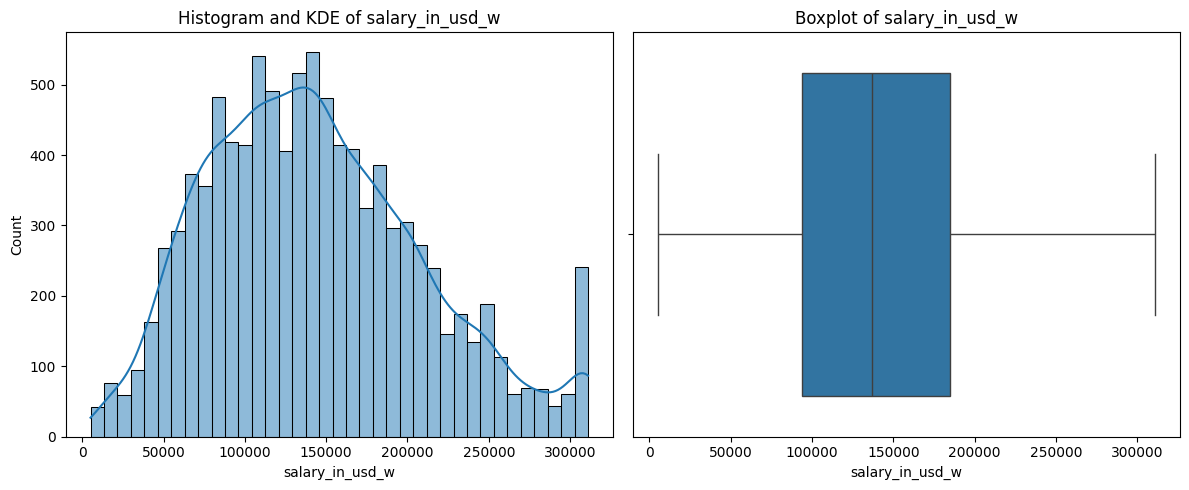

In [121]:
dpf.plot_combined_graphs(df_combined, ['salary_in_usd_w'])

<font color='yellow'>

- Most of the jobs pay between **$80k and $180k per year**.

</font>

### 1.2.3. Bivariate analysis

#### 1.2.3.1. Analysis according to salary

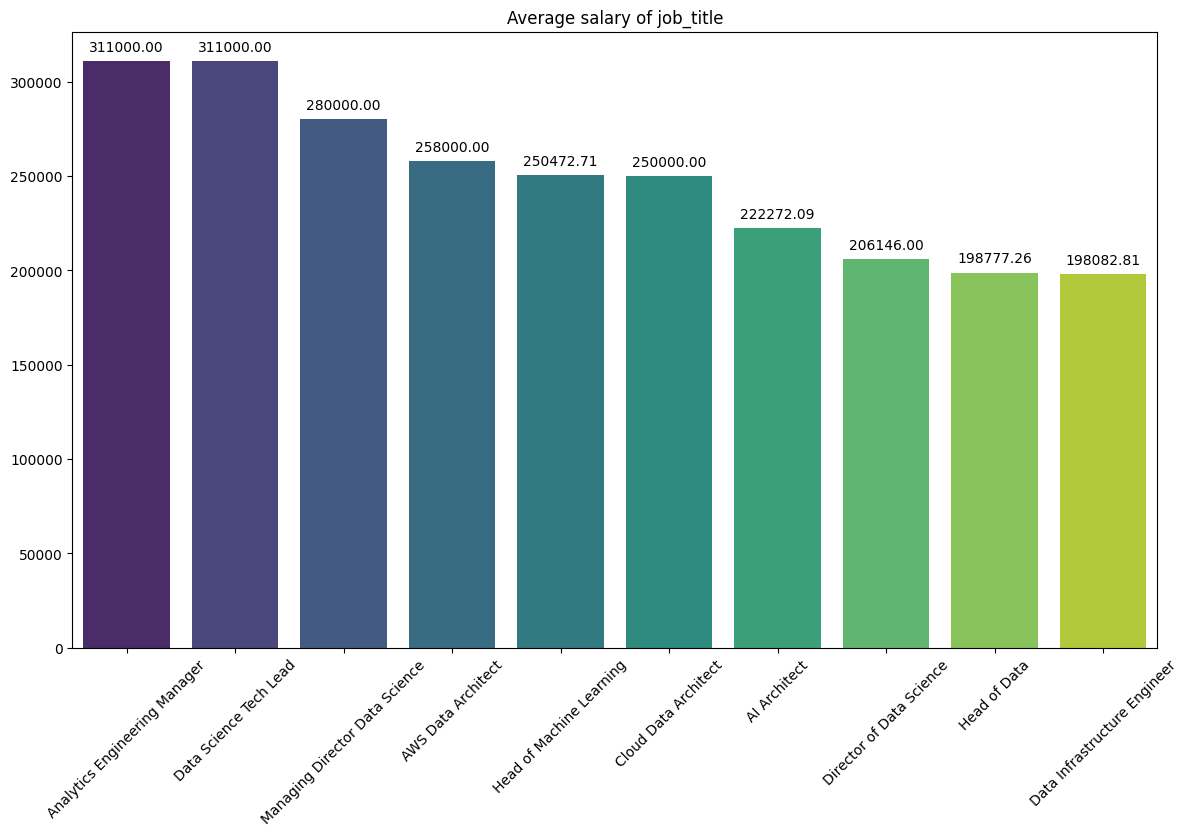

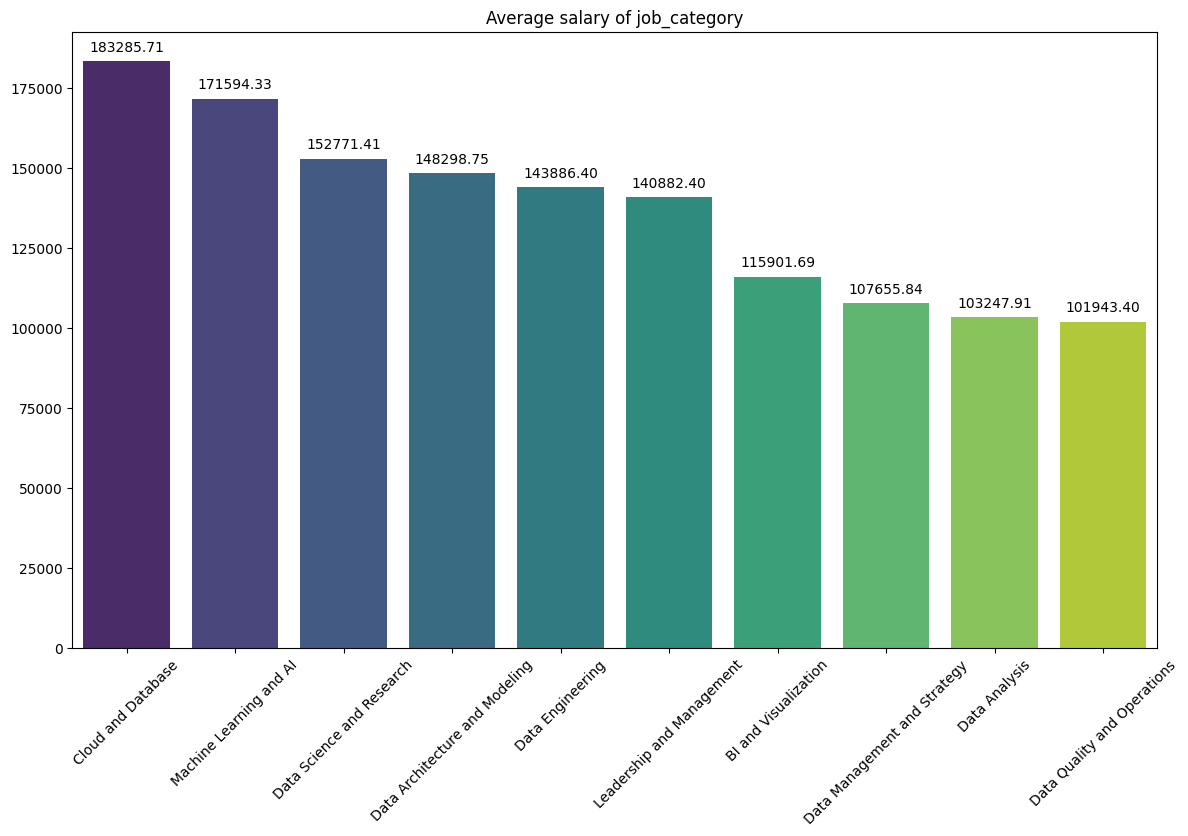

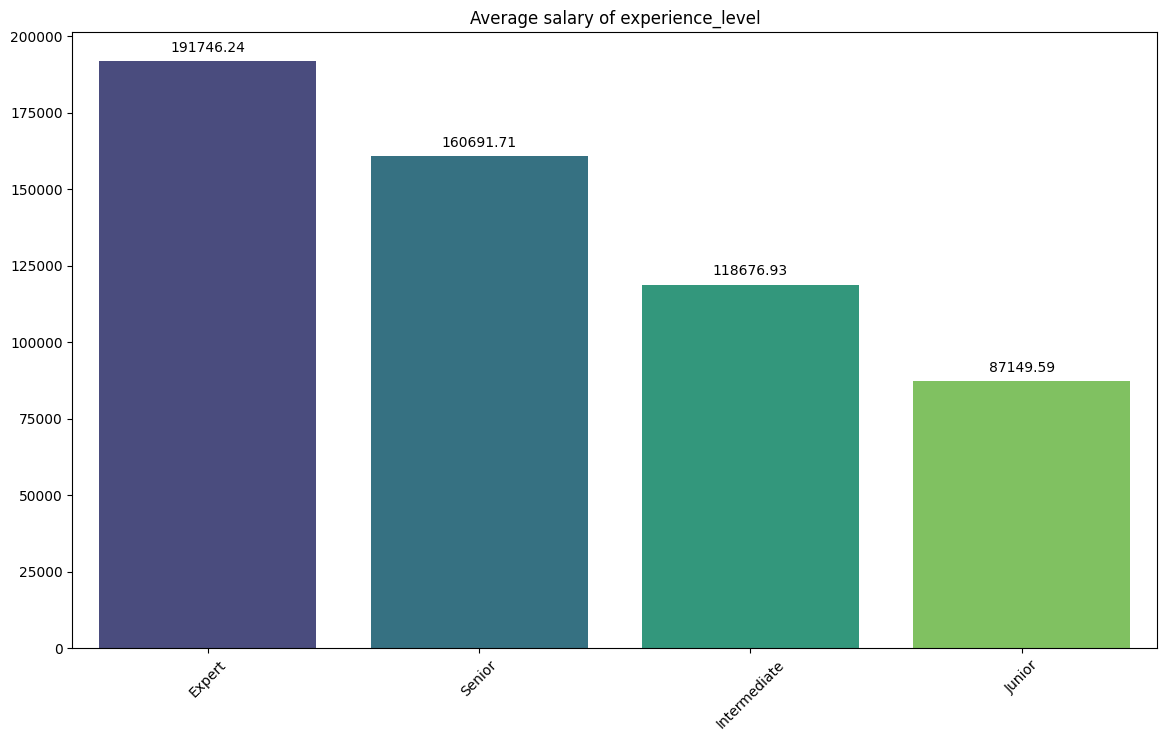

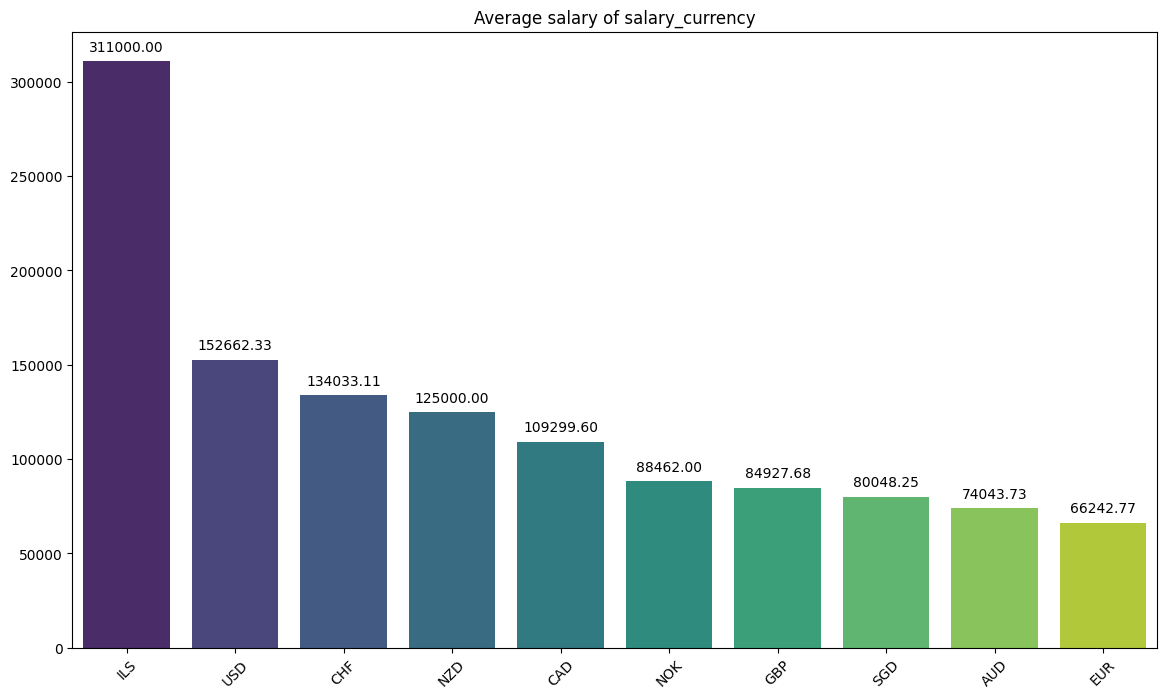

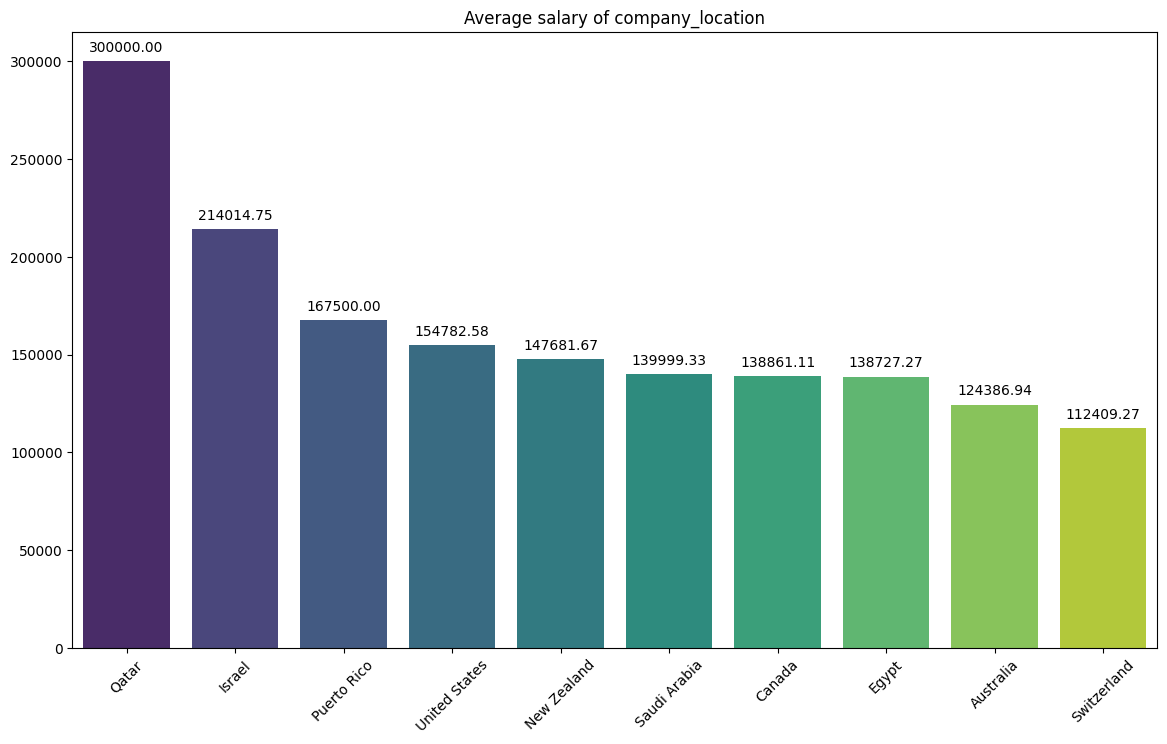

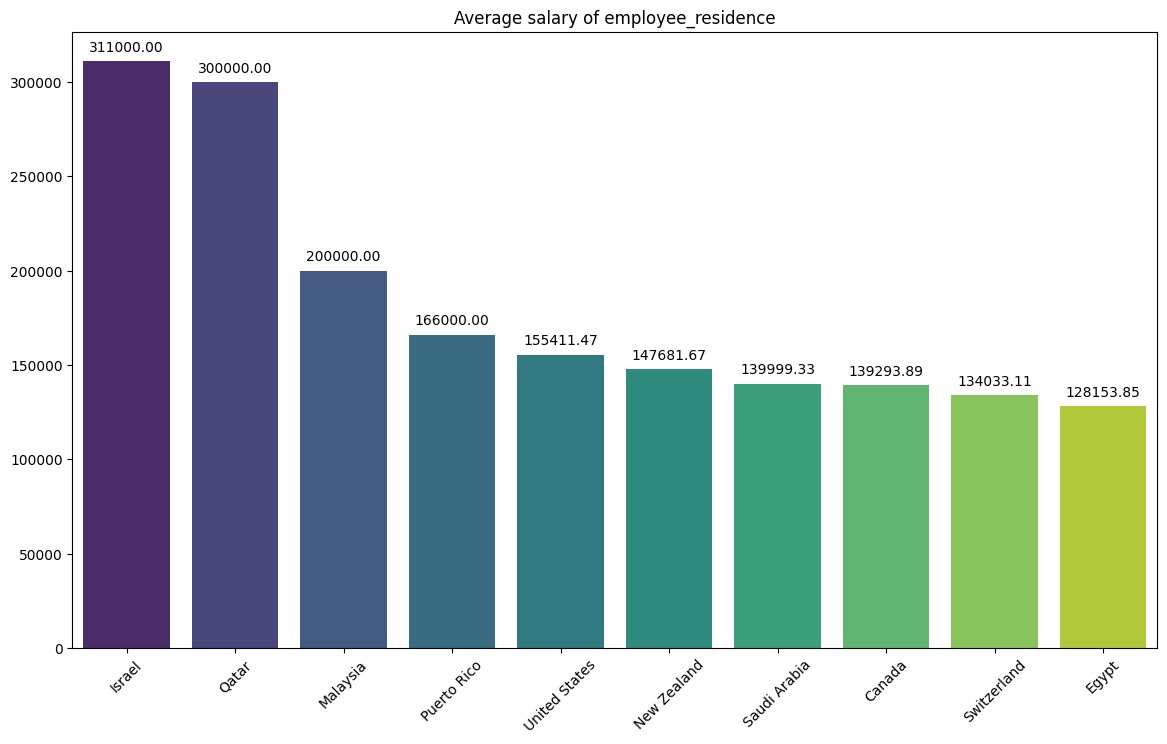

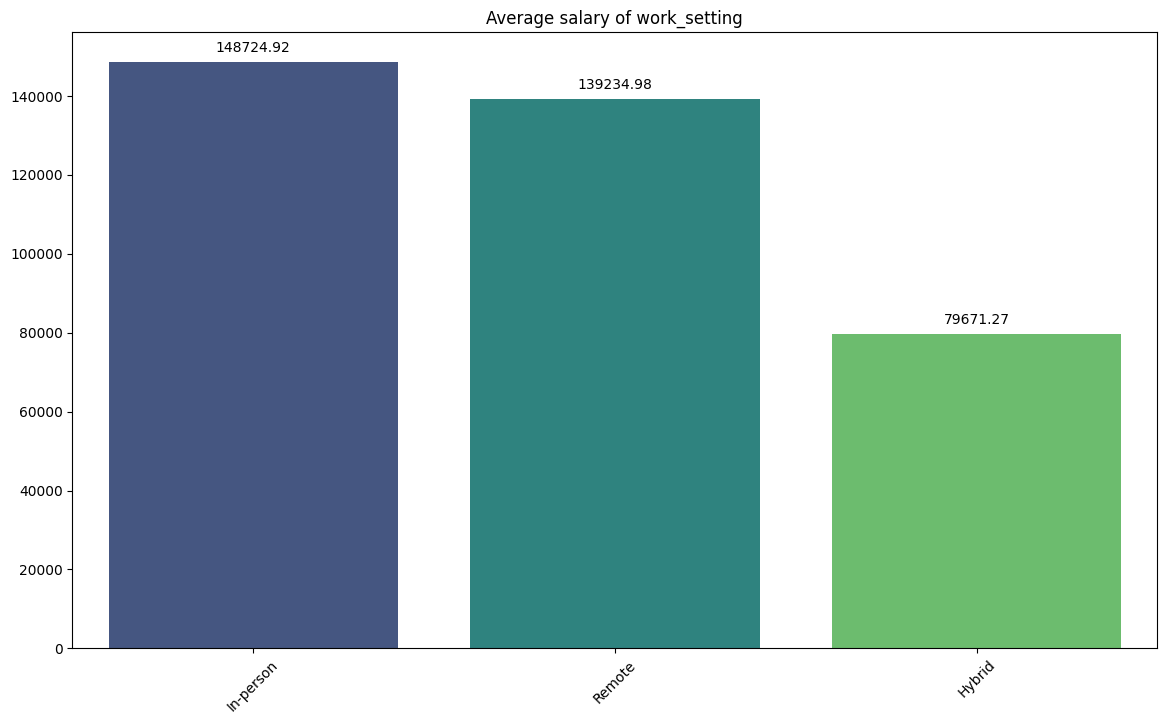

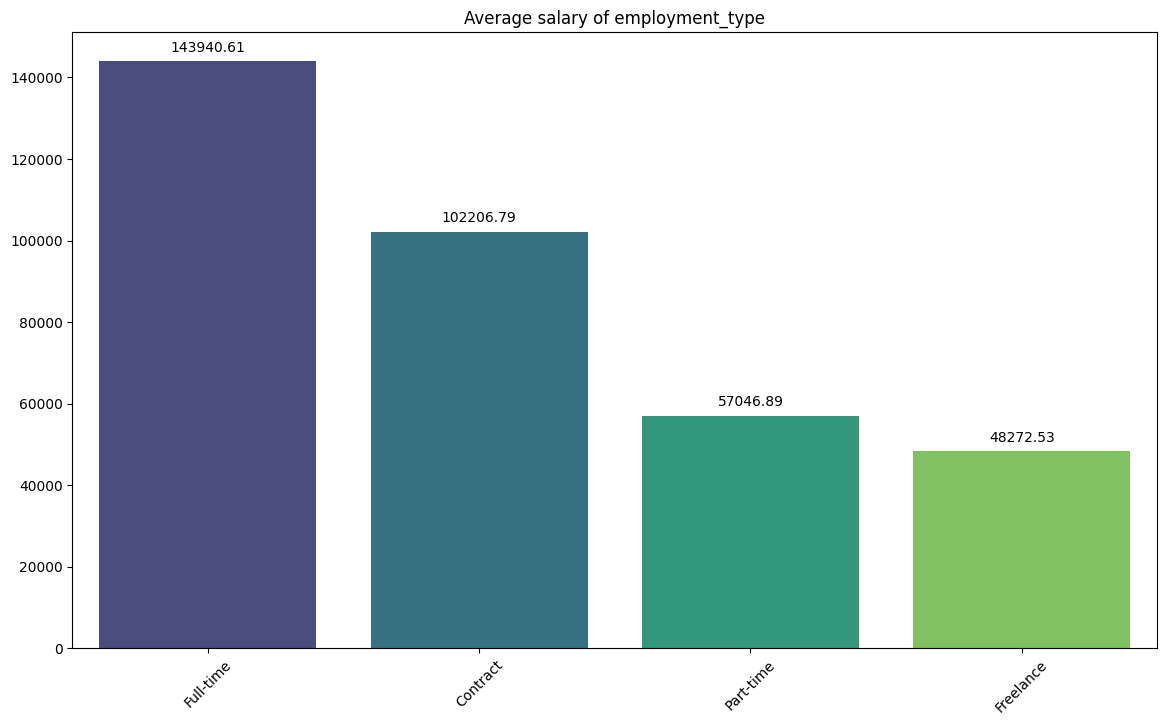

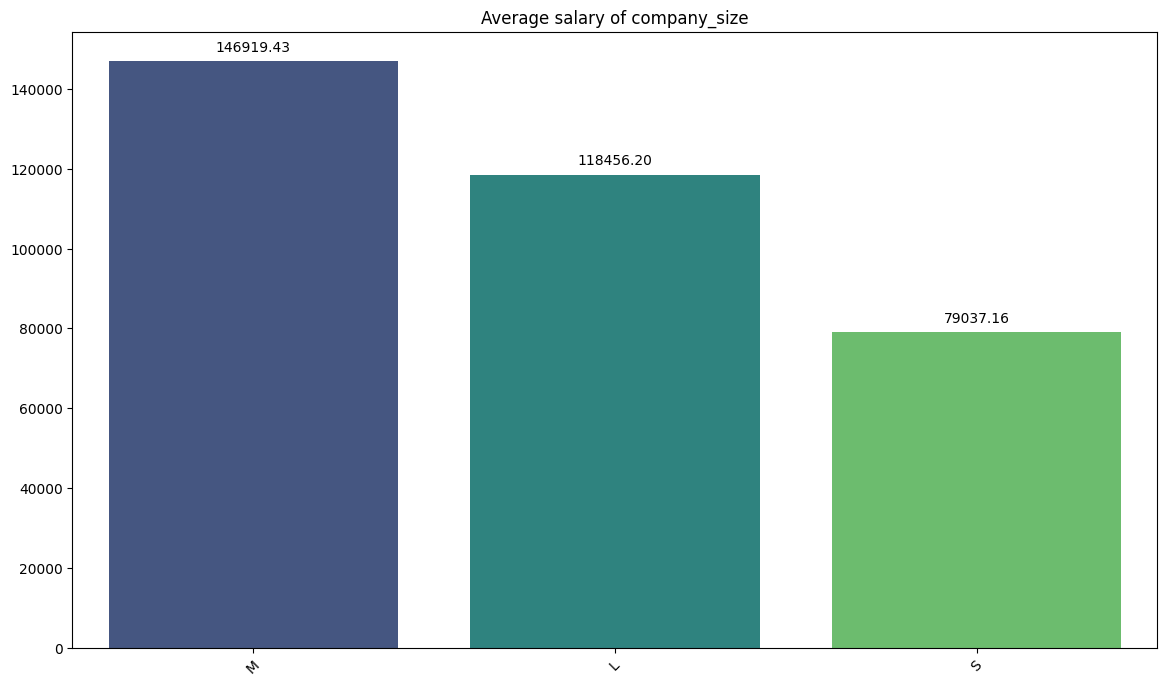

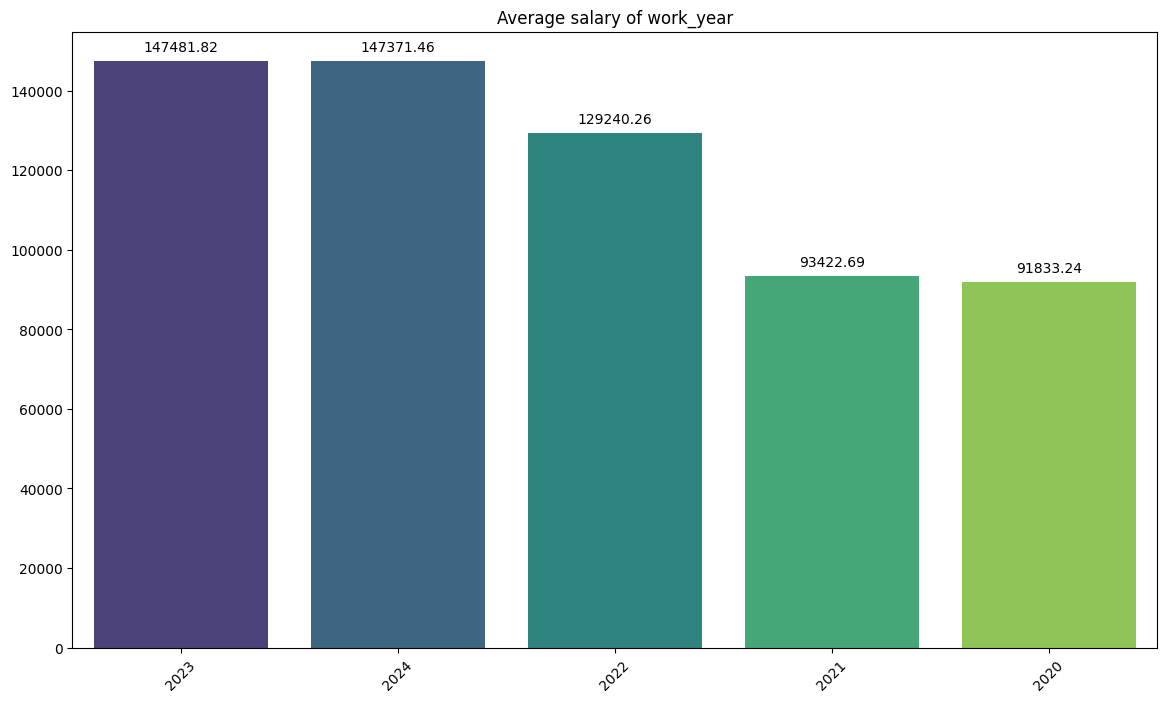

In [122]:
# Calculates the order of the categories based on the average of a specific numeric column.
def mean_order(data, col, num_col):
    return data.groupby(col)[num_col].mean().sort_values(ascending = False).index[:10]

dpf.plot_bar_with_values(data = df_combined, cat_cols = cat_cols, num_col = 'salary_in_usd_w', title = 'Average salary of {}', order_func = mean_order);

<font color='yellow'>

- The highest average salary is paid to **Analytical Engineering Managers in the Cloud and Database branch with more than 10 years of experience** (Experts).

- The highest salary is paid in Israeli New Sherkel (ILS), which does not give us much information, as 1 ILS is equivalent to $0.28. The comparison we are really interested in is in the same currency.

- The countries with the highest salaries are **Qatar and Israel** (around $300k), followed by Puerto Rico, the United States and New Zealand ($155k approx).

- The highest paid employees **live in Israel**, who outstrip those in Qatar and Malaysia by a wide margin.

- Employees who work in **100% face-to-face or 100% hybrid work have a significantly higher salary** than those in a hybrid type of work.

- The best paid jobs are **full-time, and the worst paid are freelance**.

- **Medium-sized** companies pay the best.

- **Salary has increased by almost 60% from 2020 to today**.

</font>

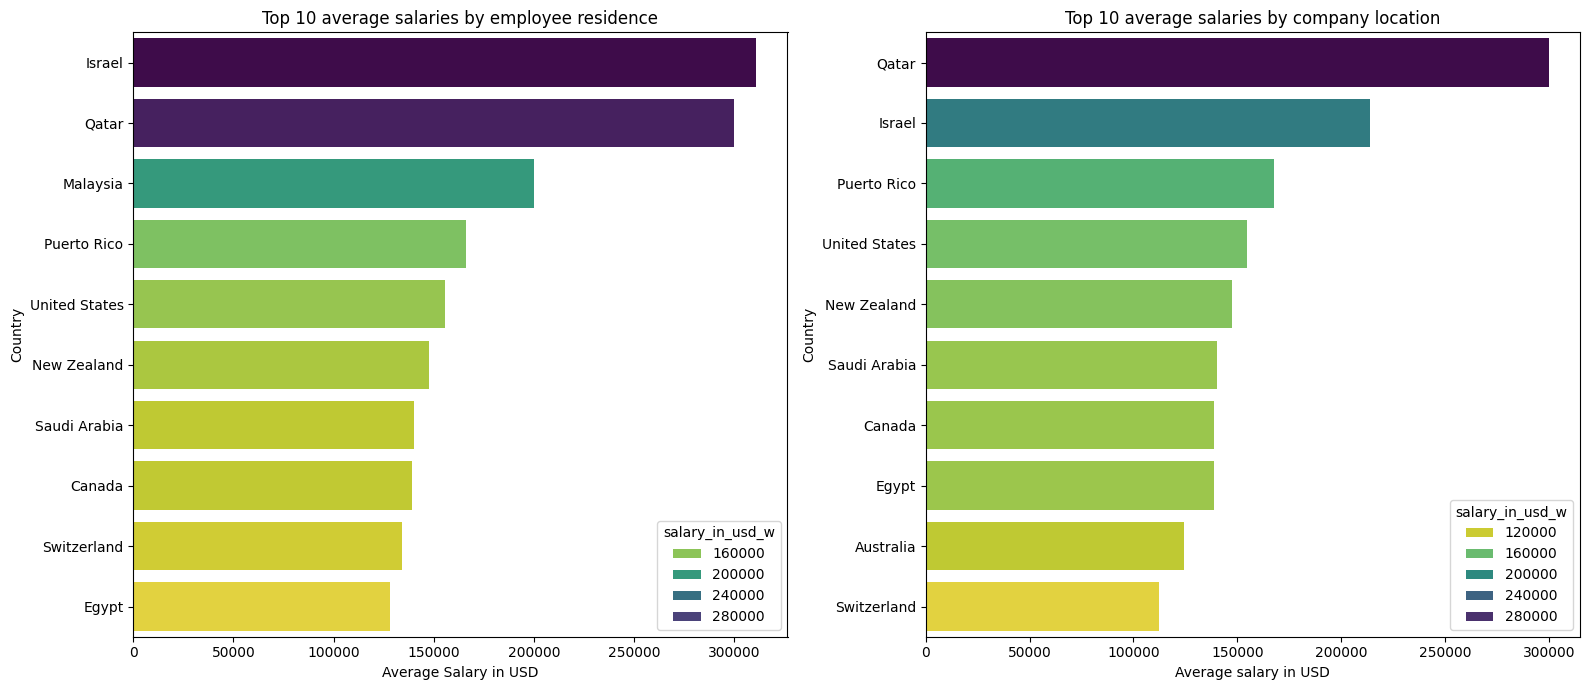

In [123]:
# Calculate the average salary by employee residence, filter for top 10 most common countries
top_employee_residence_salaries = df_combined.groupby('employee_residence')['salary_in_usd_w'].mean().nlargest(10).sort_values(ascending = False)

# Calculate the average salary by company location, filter for top 10 most common locations
top_company_location_salaries = df_combined.groupby('company_location')['salary_in_usd_w'].mean().nlargest(10).sort_values(ascending = False)

# Display the results
top_employee_residence_salaries, top_company_location_salaries

palette = sns.color_palette("viridis", as_cmap = True).reversed()

# Plotting
plt.figure(figsize = (16, 7))

# Average Salary by Employee Residence
plt.subplot(1, 2, 1)
sns.barplot(x = top_employee_residence_salaries.values, y = top_employee_residence_salaries.index, hue = top_employee_residence_salaries, palette = palette)
plt.title('Top 10 average salaries by employee residence')
plt.xlabel('Average Salary in USD')
plt.ylabel('Country')

# Average Salary by Company Location
plt.subplot(1, 2, 2)
sns.barplot(x = top_company_location_salaries.values, y = top_company_location_salaries.index, hue = top_company_location_salaries, palette = palette)
plt.title('Top 10 average salaries by company location')
plt.xlabel('Average salary in USD')
plt.ylabel('Country')

plt.tight_layout()


<font color='yellow'>

- The **10 countries with the highest number of companies** demanding these jobs **do not coincide** with the **10 countries with the highest number of employees** in these jobs.      

    - Is the employee's place of residence a factor that companies play on in order to pay them more or less?
    
    - Or is it the employees who move to live in a country where the cost of living is lower so that their salary appears to be higher?

</font>

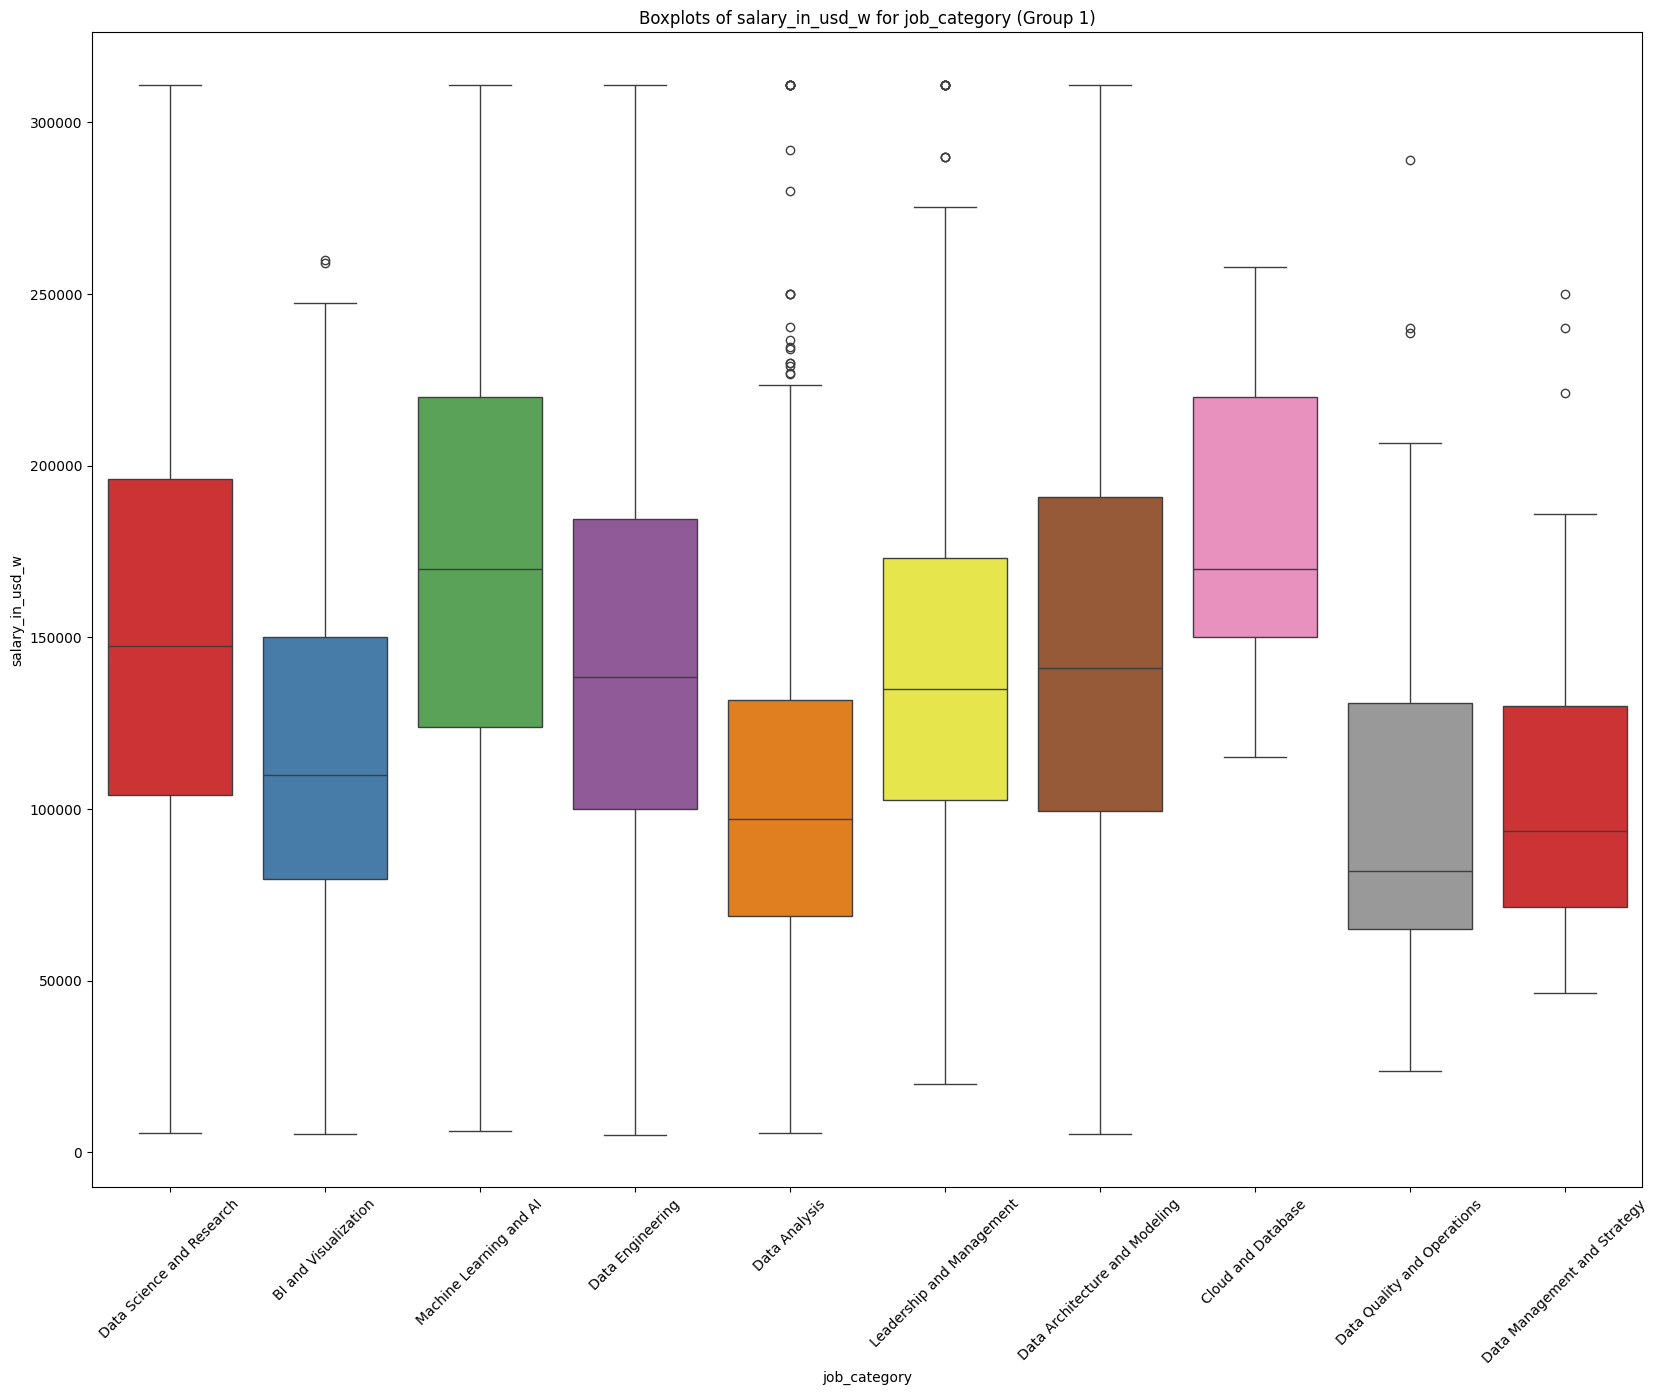

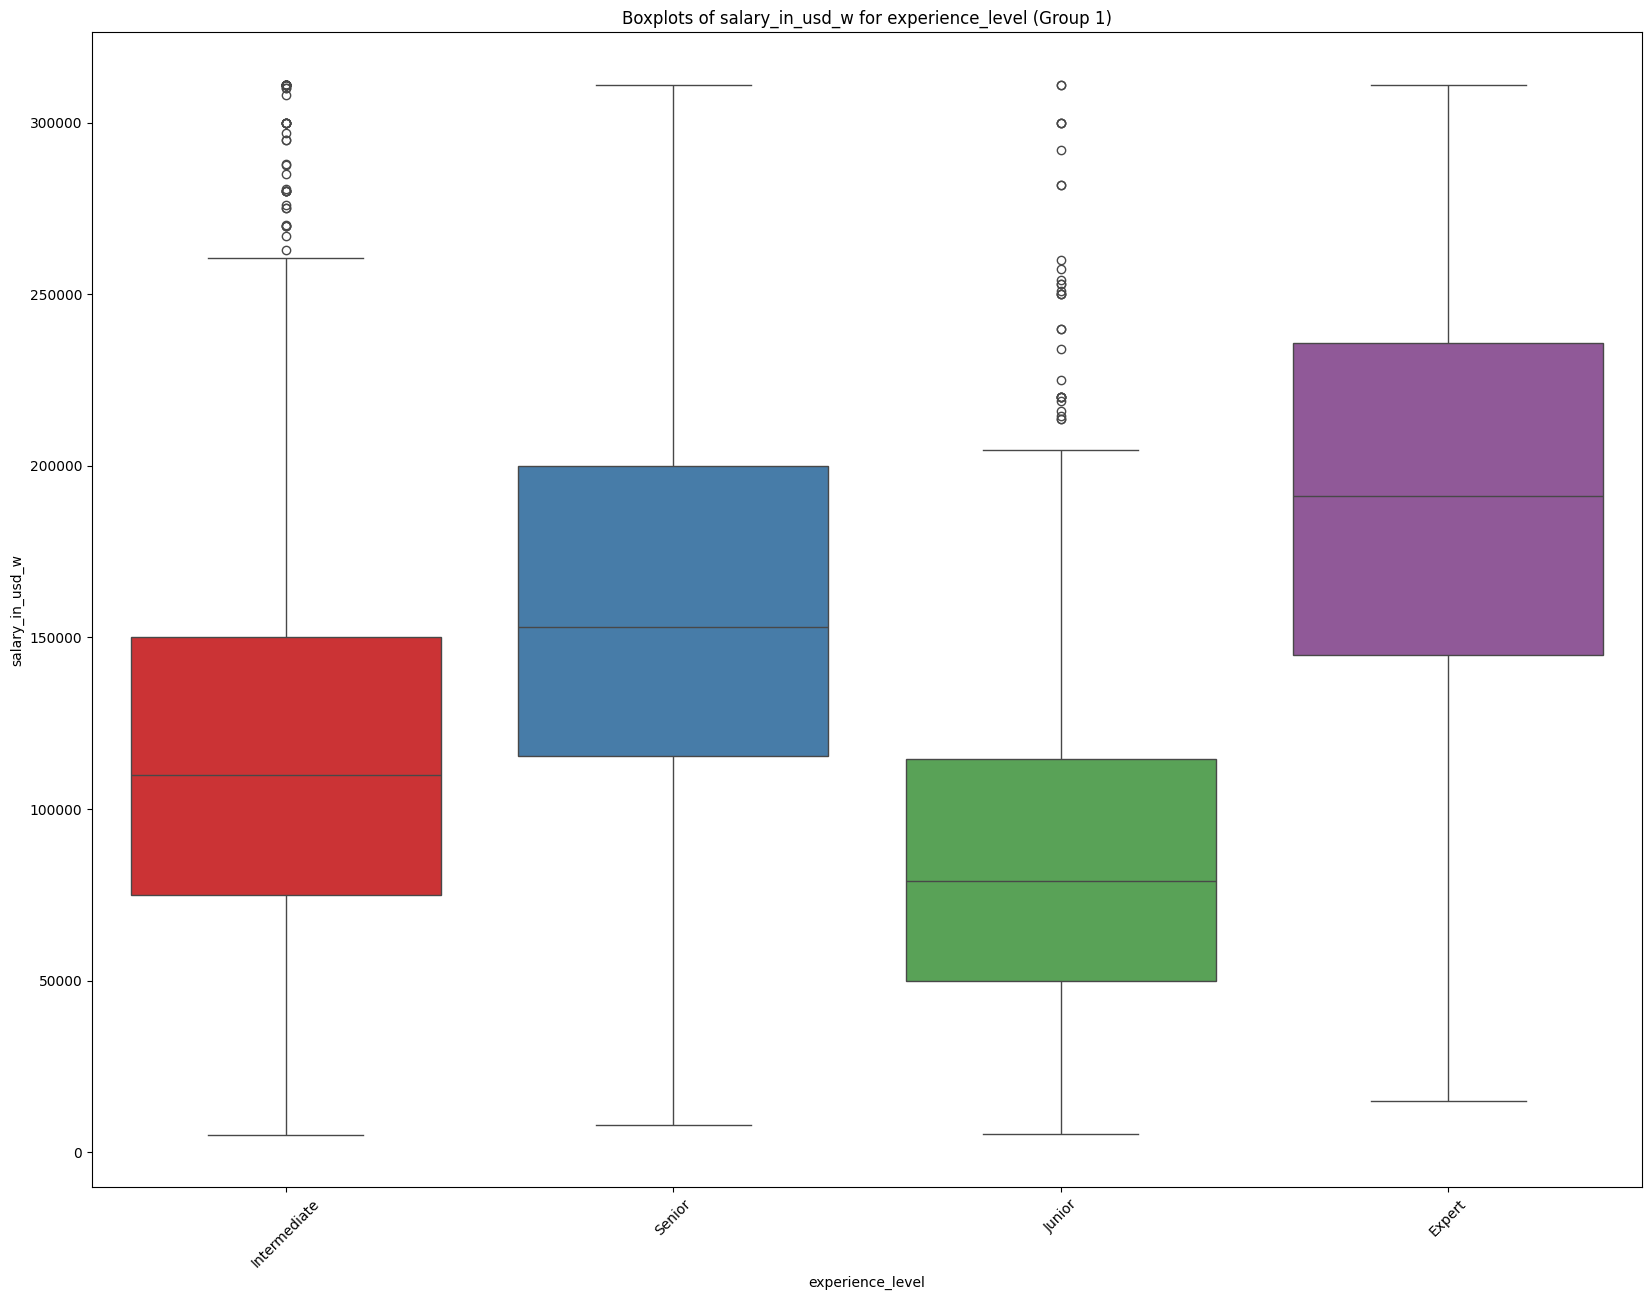

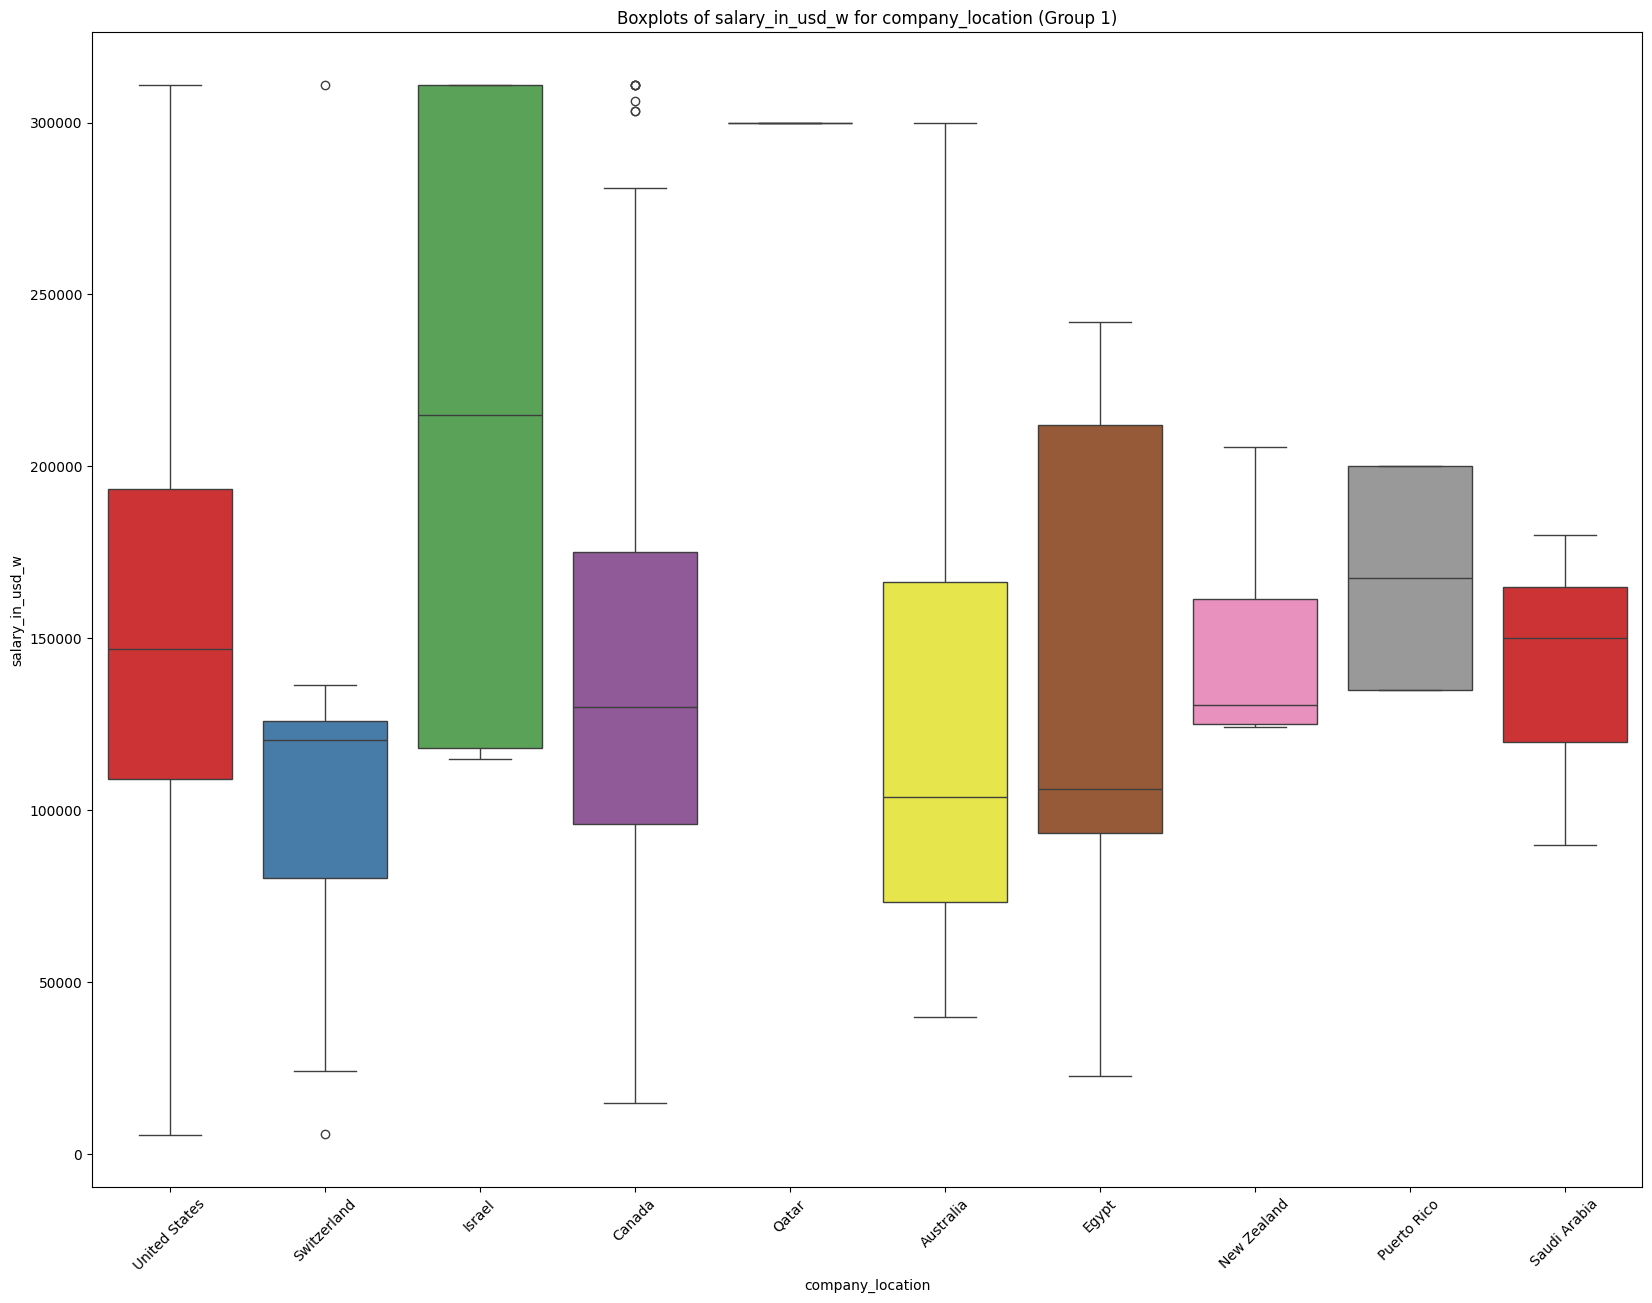

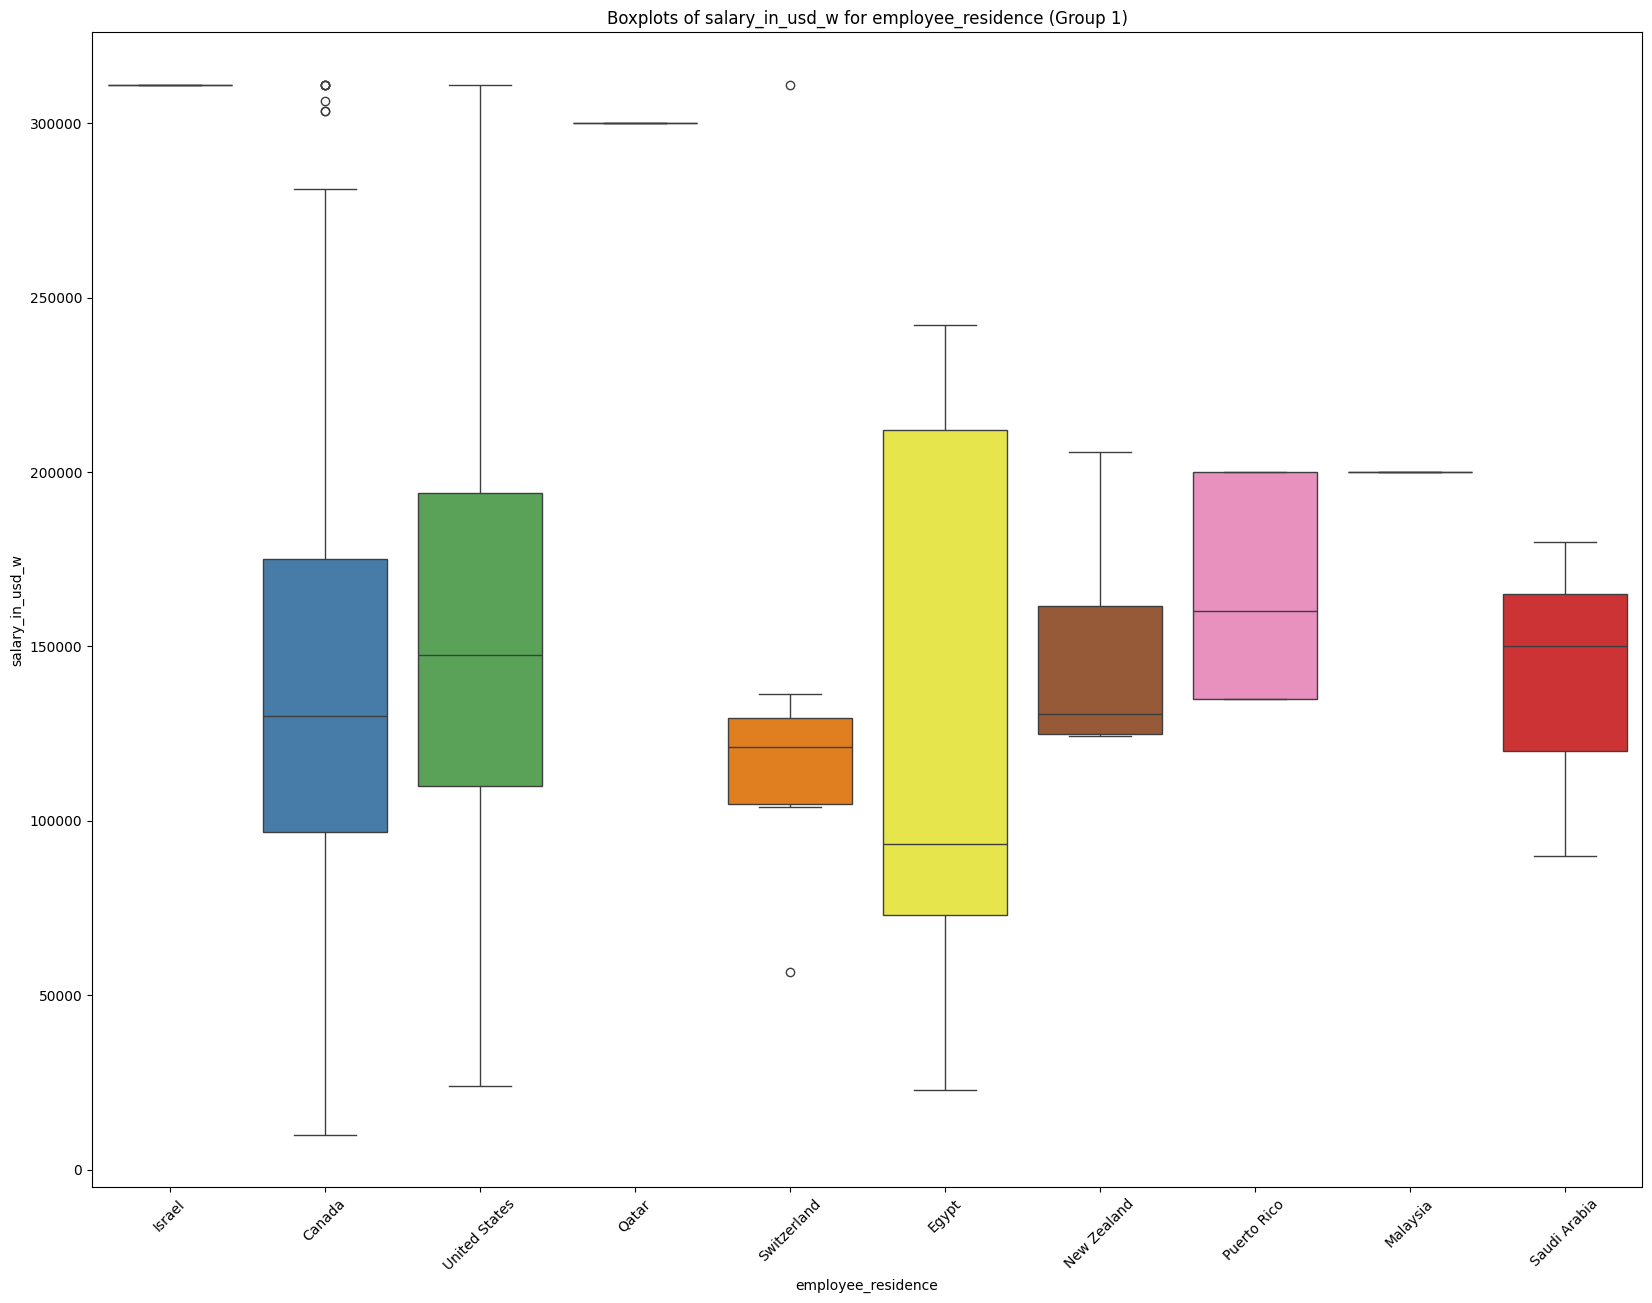

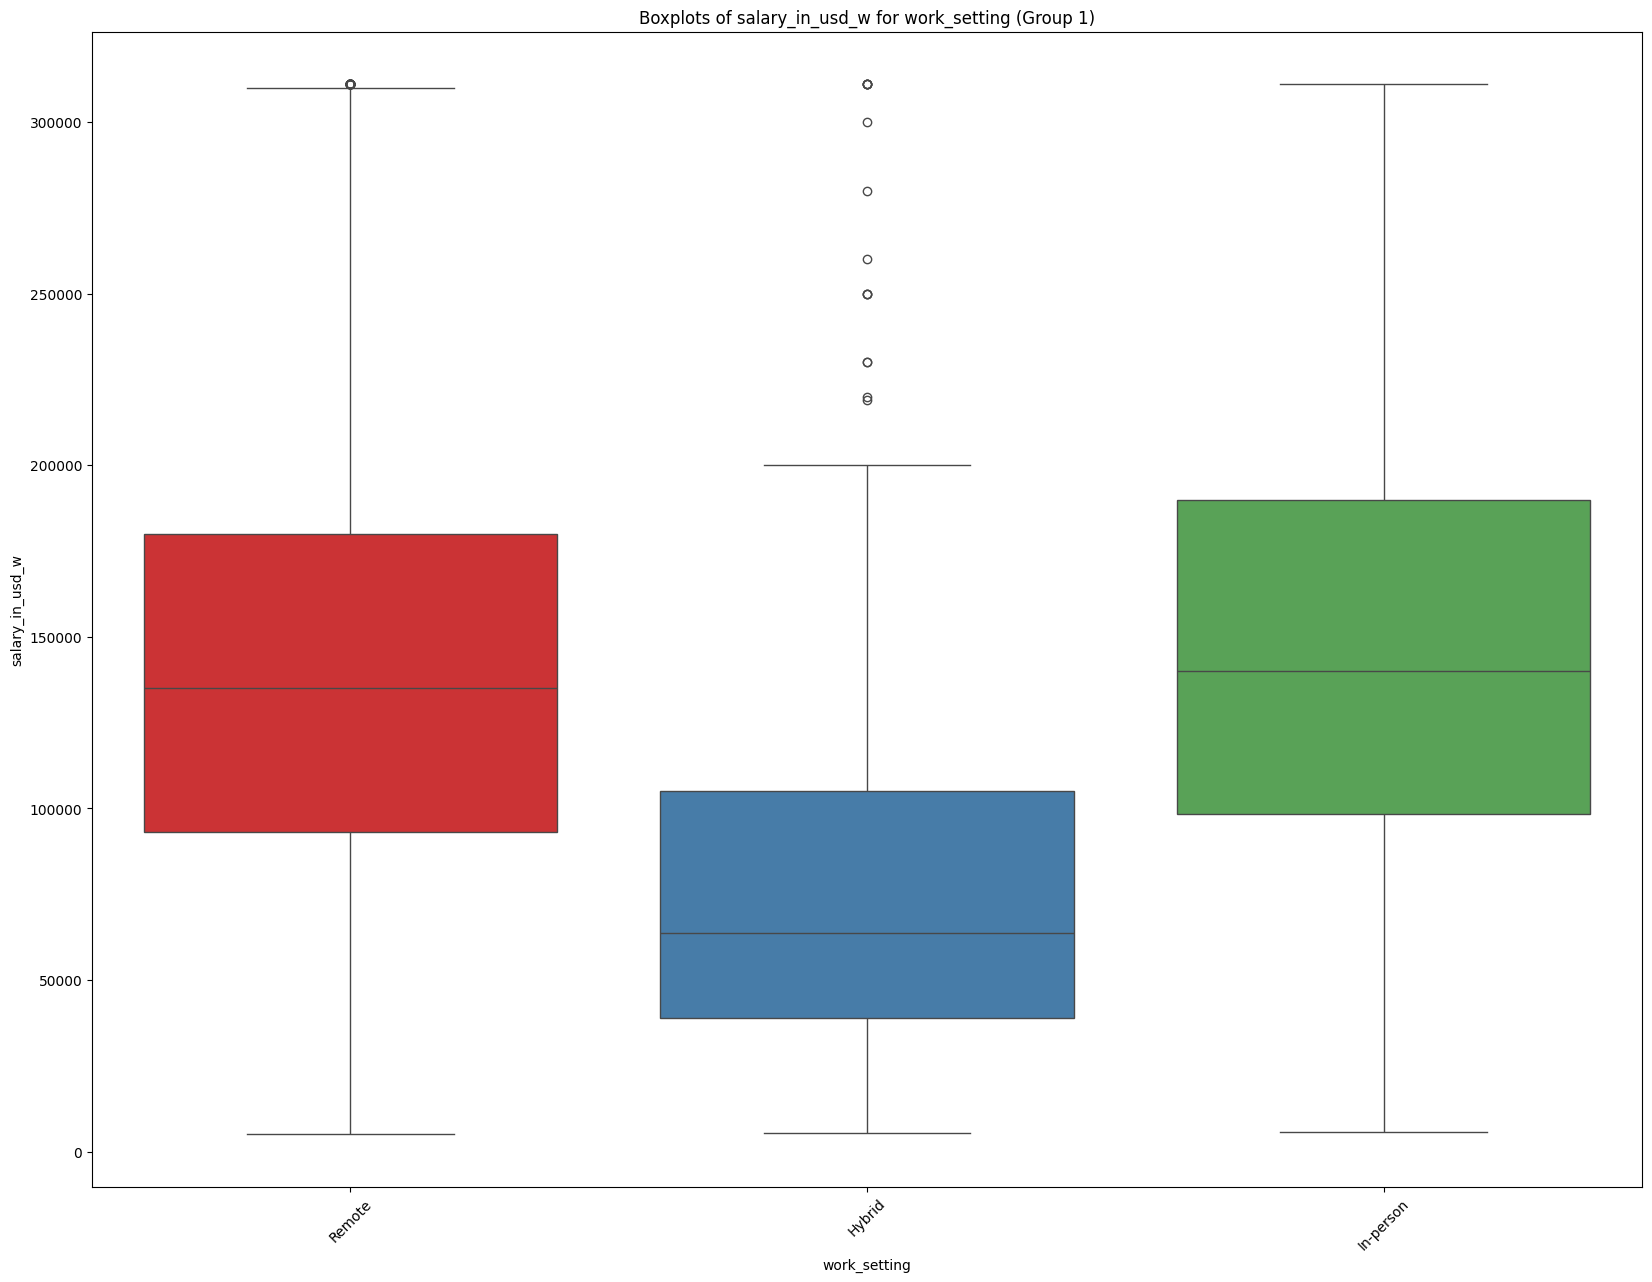

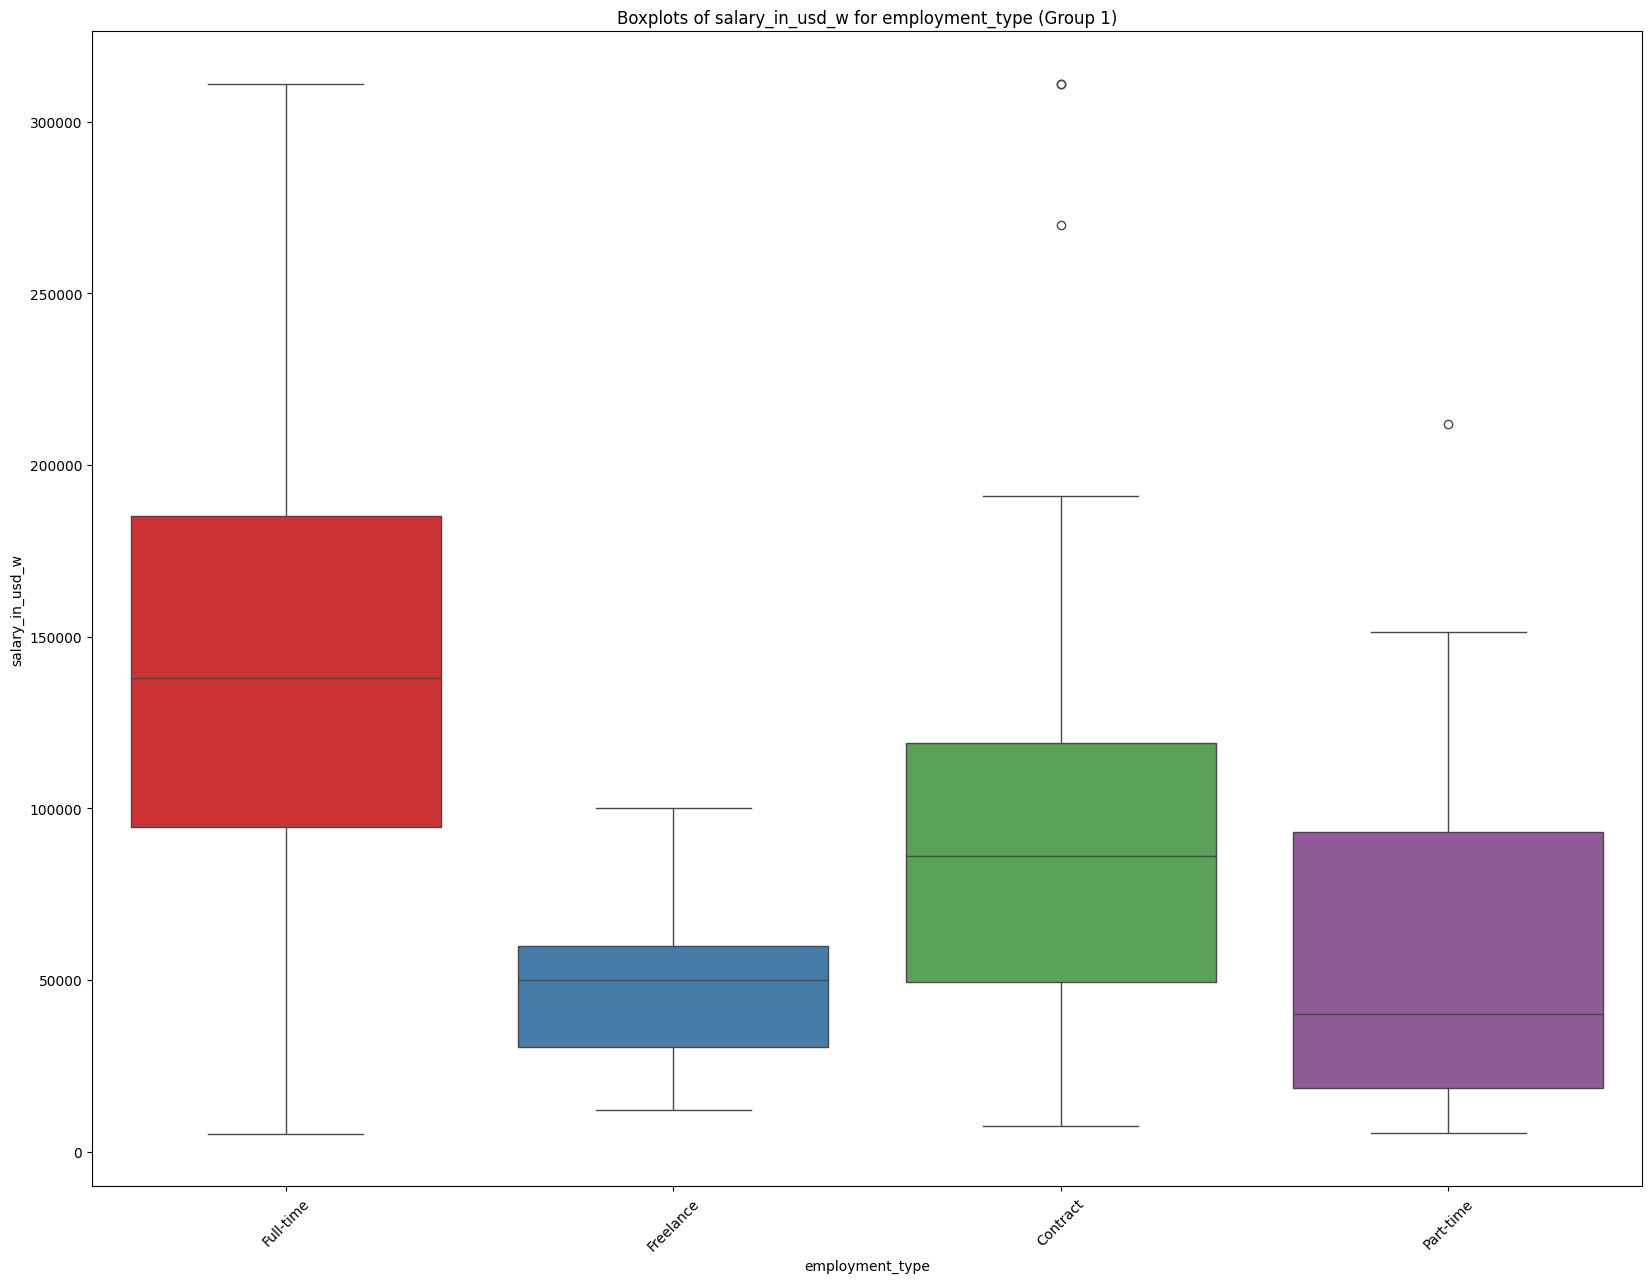

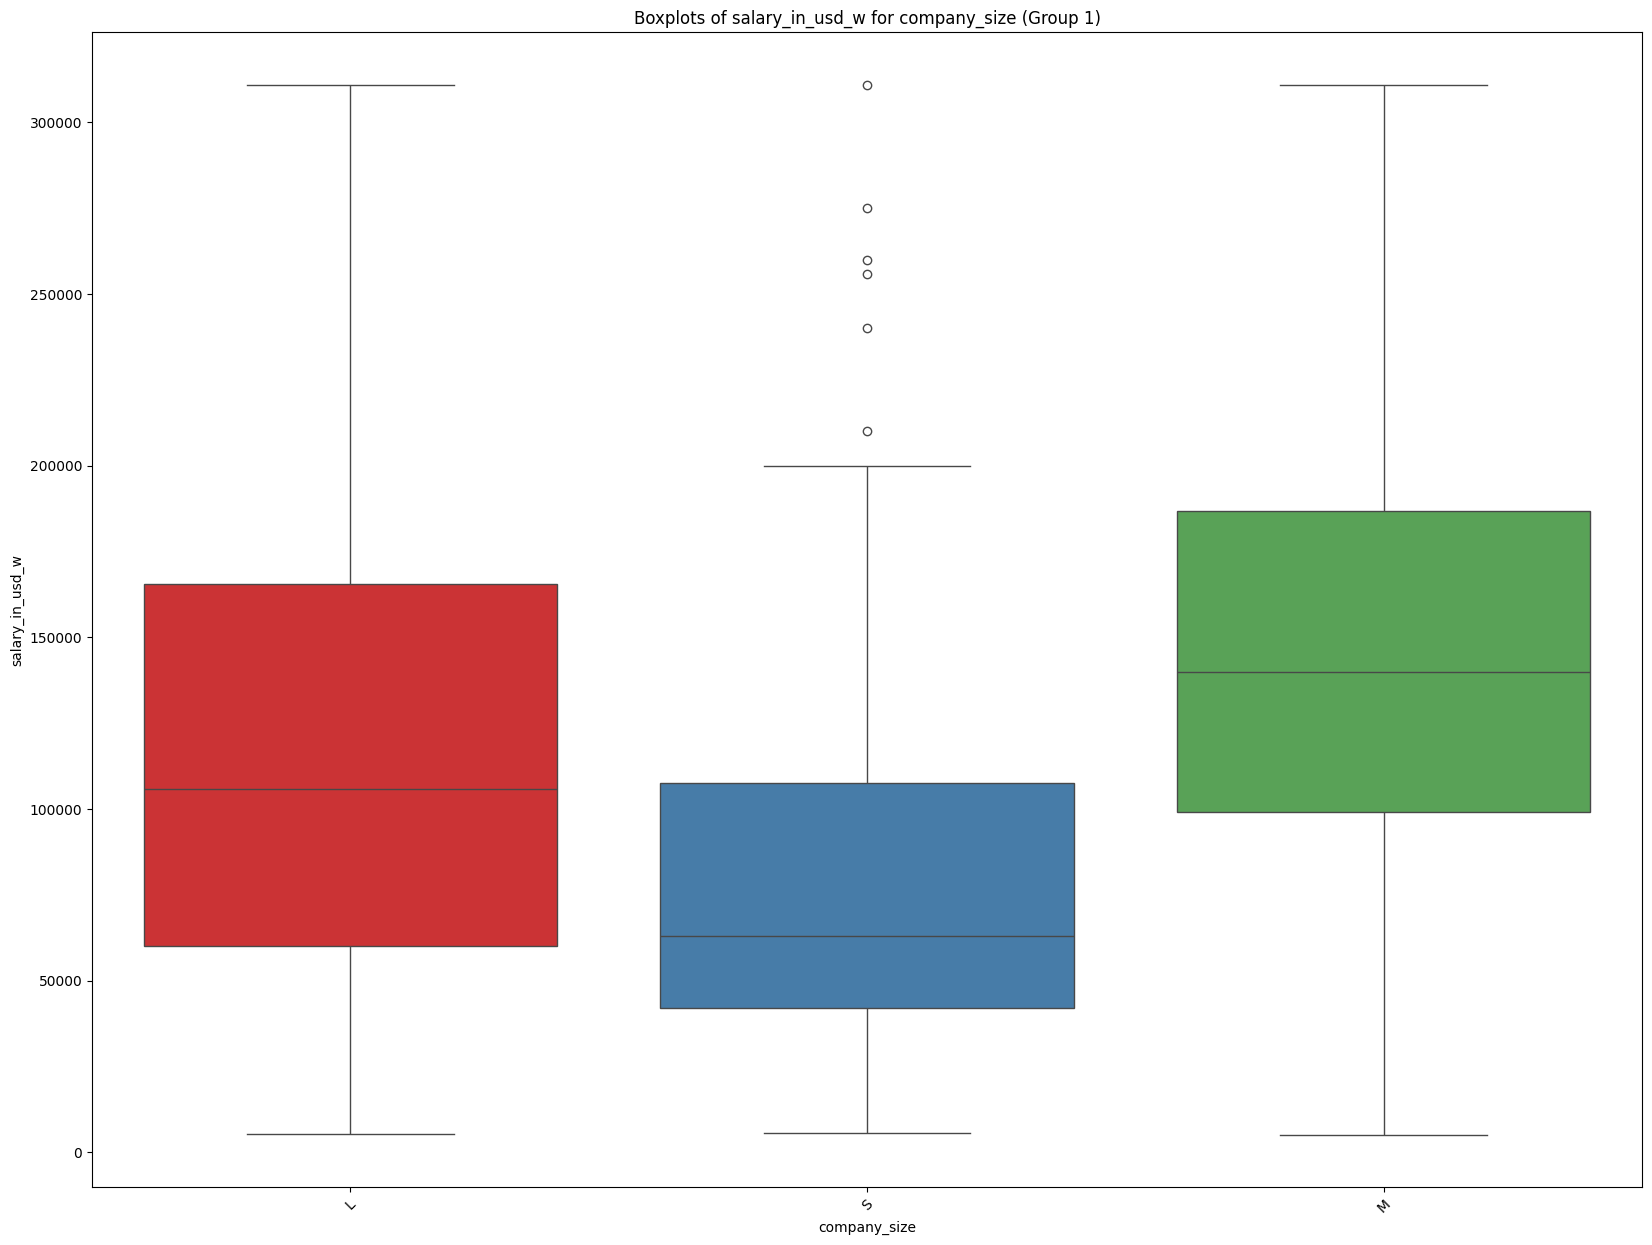

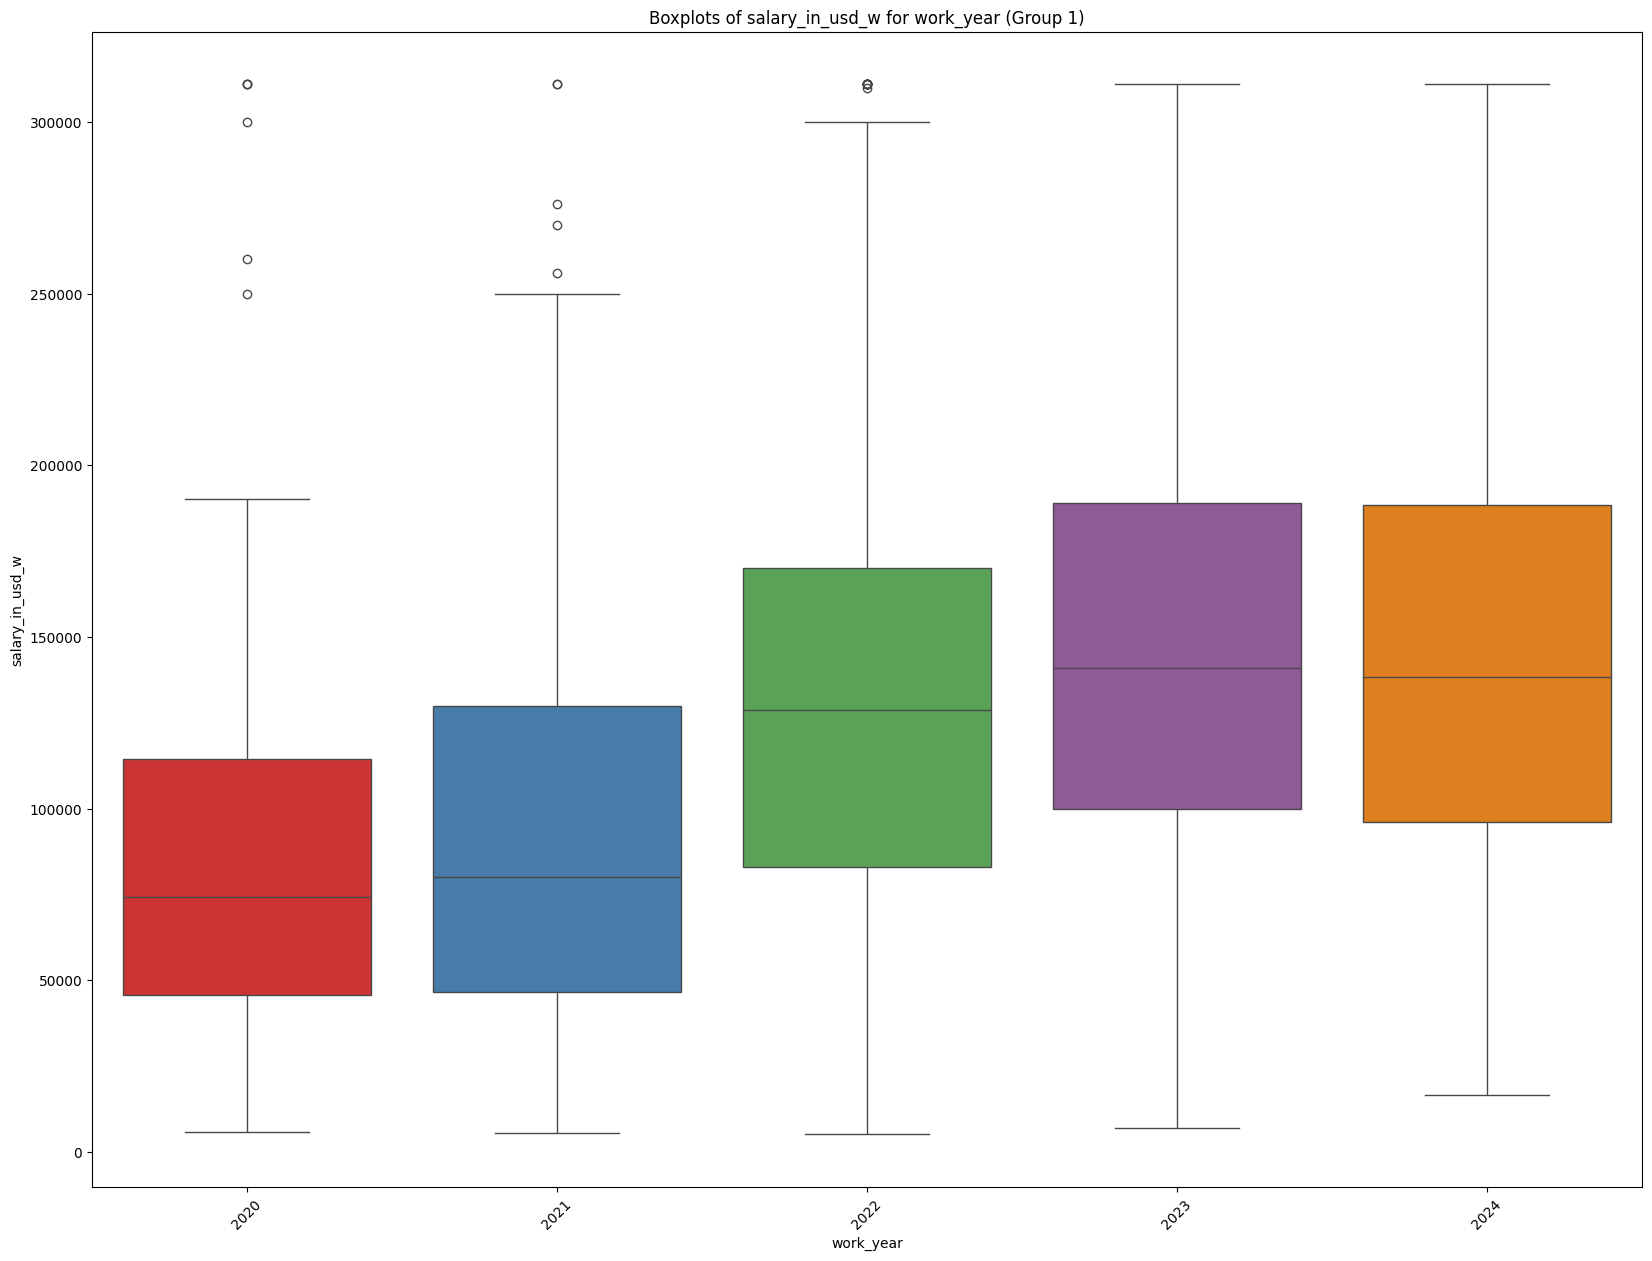

In [124]:
cat_cols2 = [
    'job_category',
    'experience_level',
    'company_location',
    'employee_residence',
    'work_setting',
    'employment_type',
    'company_size',
    'work_year'
]

dpf.plot_grouped_boxplots(df_combined, cat_cols2, num_col = 'salary_in_usd_w')

<font color='yellow'>

- **Israel and Qatar have the highest median wages**, with Israel showing a large variability in wages.   

- **The United States, Australia, Puerto Rico, and Saudi Arabia have similar and relatively high median wages**, with uniform distributions.

- Switzerland and New Zealand have medium-high median wages, but with narrower interquartile ranges, indicating less variability.

- Egypt shows high median wages, but with high variability in wages.

- **Qatar** shows consistently **high wages** but without much dispersion, which could indicate a **very specific labour market or a small sample size**.   

</font>

<font color='yellow'>
    
- 'Machine Learning and AI', 'Data Science and Research' and 'Leadership and Management' offer the highest salaries in the data field, while 'Data Analysis' and 'Data Quality and Operations' tend to offer the lowest salaries.

- The 'Cloud and Database' category shows not very high variability in salaries, with a median indicating good average compensation.

</font>

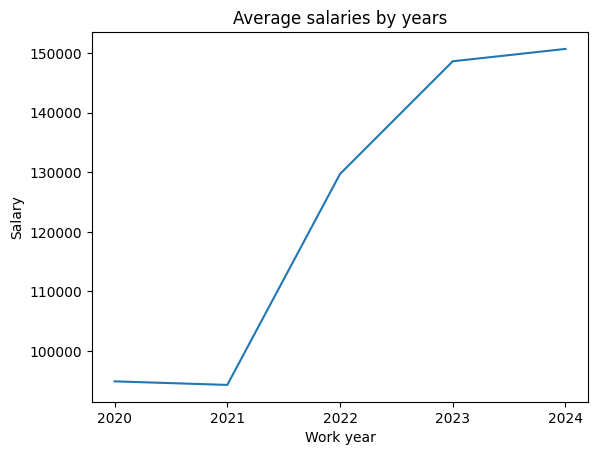

In [125]:
year_based_salary = df_combined.groupby('work_year')['salary_in_usd'].mean()

sns.lineplot(x = ['2020', '2021', '2022', '2023', '2024'], y = year_based_salary)
plt.title("Average salaries by years")
plt.xlabel('Work year')
plt.ylabel('Salary')
plt.show()

In [126]:
# Group the data by 'company_location' and calculate the average wage
salary_data = df_combined.groupby('company_location')['salary_in_usd_w'].mean().reset_index()

# Download the GeoJSON country file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Adjust country names
salary_data['company_location'] = salary_data['company_location'].replace({'United States': 'United States of America'})

# Create the map centred on an initial location
map = folium.Map(location = [0, 0], zoom_start = 2)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'choropleth',
    data = salary_data,
    columns = ['company_location', 'salary_in_usd_w'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map)

# Add control layer
folium.LayerControl().add_to(map)

# Save the map
map.save('../img/salary_map.html')

map

#### 1.2.3.2. Analysis according to company location

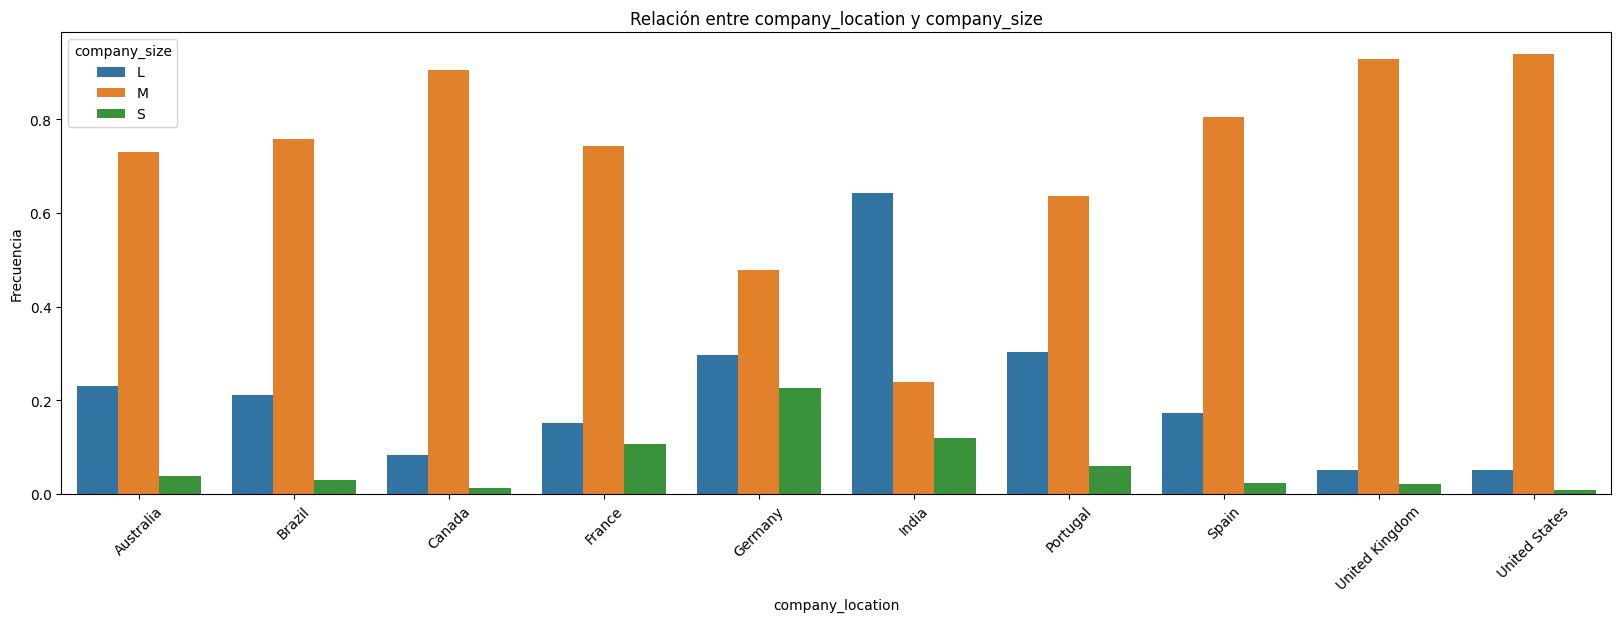

In [127]:
# Filter cat_col1 to include only the top 10 categories if more than 5 exist
top_cat_col1_values_loc = df_combined['company_location'].value_counts().nlargest(10).index
count_data_loc = df_combined[df_combined['company_location'].isin(top_cat_col1_values_loc)]

top_cat_col1_values_res = df_combined['employee_residence'].value_counts().nlargest(10).index
count_data_res = df_combined[df_combined['employee_residence'].isin(top_cat_col1_values_res)]


dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'company_size', relative_freq = True, size_group = 10)

In all cases if P-Value < 0.05 we reject the null hypothesis that there is no difference between the means and conclude that there is a significant difference.

In [128]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['company_size'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 1168.3178013925851
P-Value: 6.85044256627332e-237
Degrees of Freedom: 18
Expected Frequency Table:
 [[3.37839254e+00 4.78478466e+01 7.73760872e-01]
 [2.14397988e+00 3.03649796e+01 4.91040553e-01]
 [2.44283768e+01 3.45976737e+02 5.59488630e+00]
 [4.28795976e+00 6.07299591e+01 9.82081107e-01]
 [7.21156869e+00 1.02136749e+02 1.65168186e+00]
 [5.45740333e+00 7.72926753e+01 1.24992141e+00]
 [2.14397988e+00 3.03649796e+01 4.91040553e-01]
 [5.65231059e+00 8.00531279e+01 1.29456146e+00]
 [3.96961123e+01 5.62212197e+02 9.09169024e+00]
 [5.25599916e+02 7.44402075e+03 1.20379336e+02]]


<font color='yellow'>

- In all cases except in India, the size of company that stands out and which is most in demand for this type of job are **medium-sized companies**, with small companies having the least need for this type of employee.

</font>

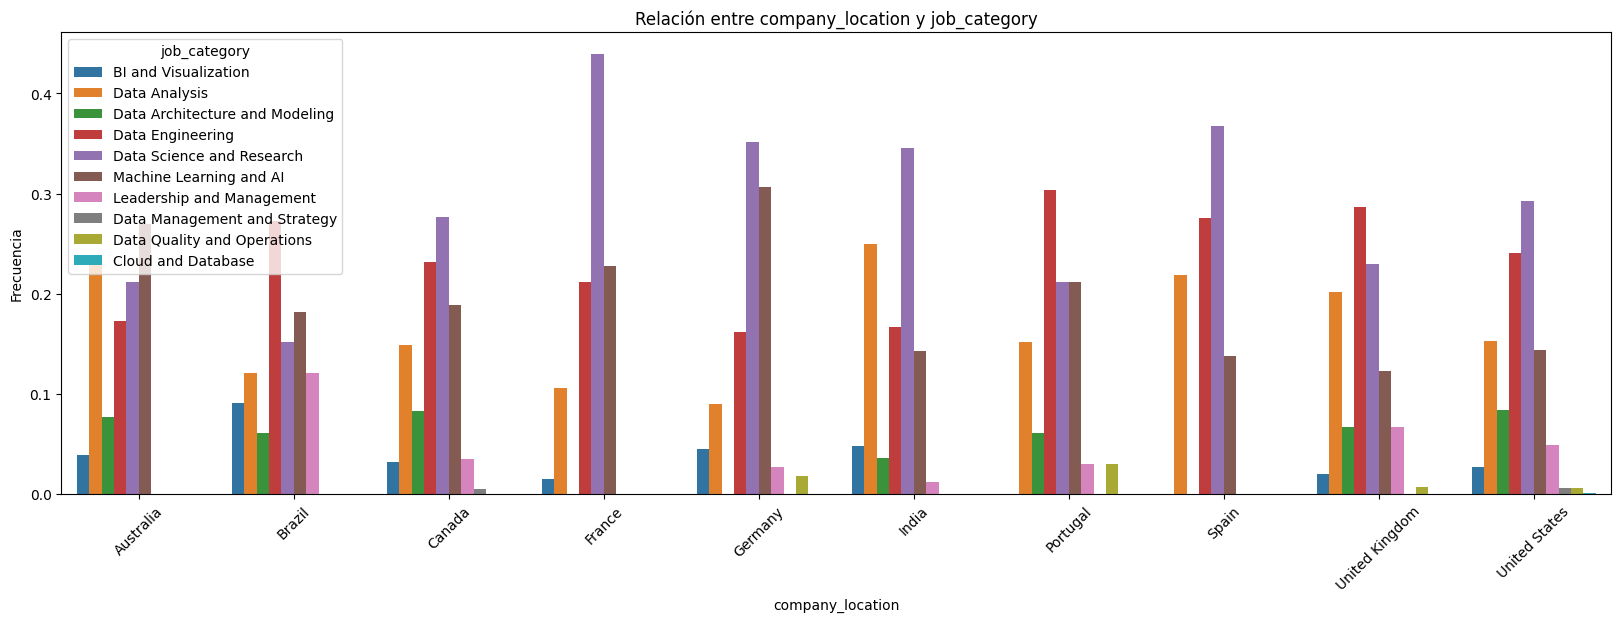

In [129]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'job_category', relative_freq = True, size_group = 10)

In [130]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['job_category'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 172.70625548407077
P-Value: 1.3469798882757979e-08
Degrees of Freedom: 81
Expected Frequency Table:
 [[1.38950016e+00 3.81431416e-02 8.11904013e+00 4.14125537e+00
  1.25654406e+01 2.61552971e-01 2.99696112e-01 1.50501939e+01
  2.47930420e+00 7.65587342e+00]
 [8.81798177e-01 2.42062245e-02 5.15246778e+00 2.62810437e+00
  7.97422194e+00 1.65985539e-01 1.90191764e-01 9.55108456e+00
  1.57340459e+00 4.85853505e+00]
 [1.00471550e+01 2.75804254e-01 5.87069056e+01 2.99444619e+01
  9.08578015e+01 1.89122917e+00 2.16703343e+00 1.08824479e+02
  1.79272765e+01 5.53578539e+01]
 [1.76359635e+00 4.84124489e-02 1.03049356e+01 5.25620874e+00
  1.59484439e+01 3.31971078e-01 3.80383527e-01 1.91021691e+01
  3.14680918e+00 9.71707010e+00]
 [2.96604841e+00 8.14209368e-02 1.73310280e+01 8.83998743e+00
  2.68223829e+01 5.58314995e-01 6.39735932e-01 3.21263754e+01
  5.29236089e+00 1.63423452e+01]
 [2.24457718e+00 6.16158441e-02 1.31153725e+01 6.68972021e+00
  2.02980195e+01 4.22508645e-01 

<font color='yellow'>

- In most countries the most in-demand job categories are 'Data Science and Research', 'Data Engineering', 'Machine Learning and AI' and 'Data Analysis'.

</font>

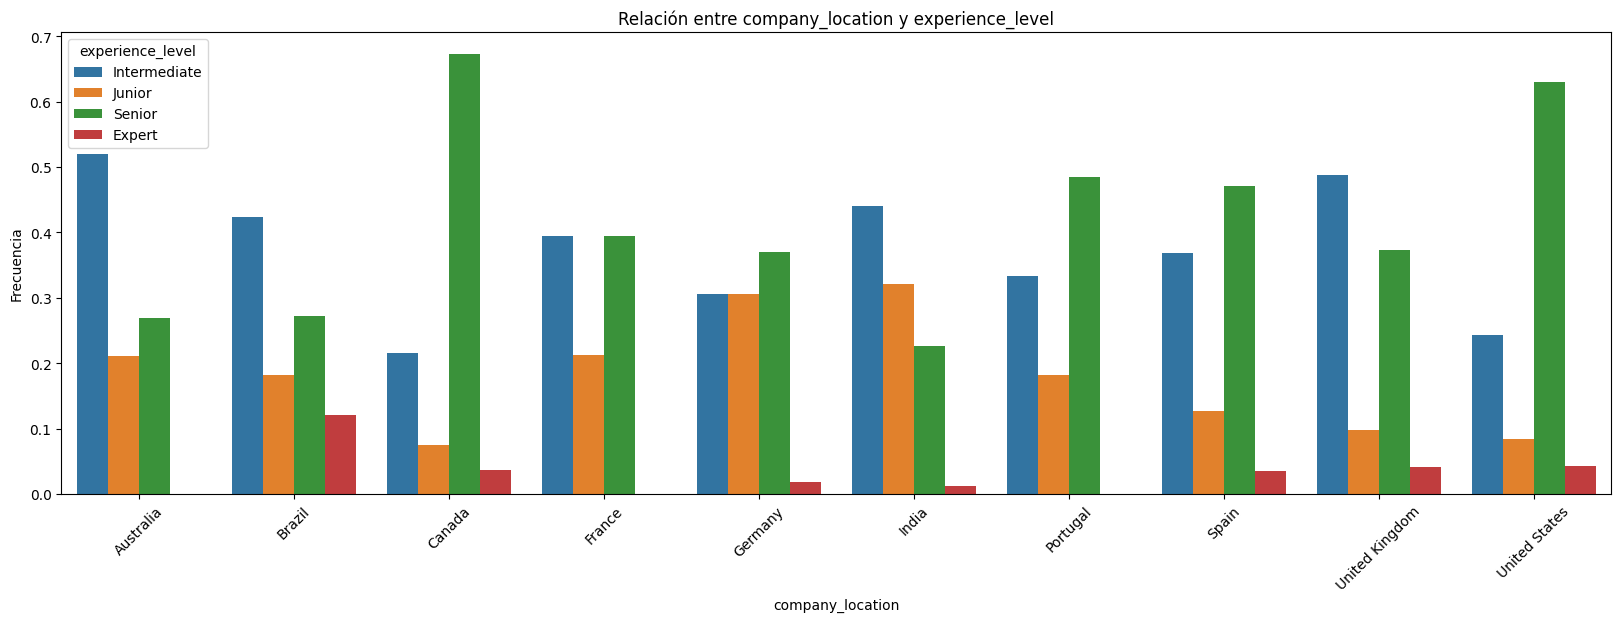

In [131]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'experience_level', relative_freq = True, size_group = 10)

In [132]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['experience_level'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 435.7241837260825
P-Value: 2.531435056376347e-75
Degrees of Freedom: 27
Expected Frequency Table:
 [[2.11966887e+00 1.37860212e+01 4.80603584e+00 3.12882741e+01]
 [1.34517447e+00 8.74882113e+00 3.04998428e+00 1.98560201e+01]
 [1.53268364e+01 9.96835377e+01 3.47513361e+01 2.26238290e+02]
 [2.69034895e+00 1.74976423e+01 6.09996856e+00 3.97120402e+01]
 [4.52467777e+00 2.94278529e+01 1.02590380e+01 6.67884313e+01]
 [3.42408048e+00 2.22697265e+01 7.76359635e+00 5.05425967e+01]
 [1.34517447e+00 8.74882113e+00 3.04998428e+00 1.98560201e+01]
 [3.54636907e+00 2.30650739e+01 8.04086765e+00 5.23476894e+01]
 [2.49061092e+01 1.61985749e+02 5.64709211e+01 3.67637221e+02]
 [3.29771560e+02 2.14478675e+03 7.47708268e+02 4.86773342e+03]]


<font color='yellow'>

- The most demanded profiles in almost all countries are between junior and senior (between 6 and 10 years). The least in demand are expert profiles. Companies may want someone who learns with them and can achieve that level by growing within the company.

</font>

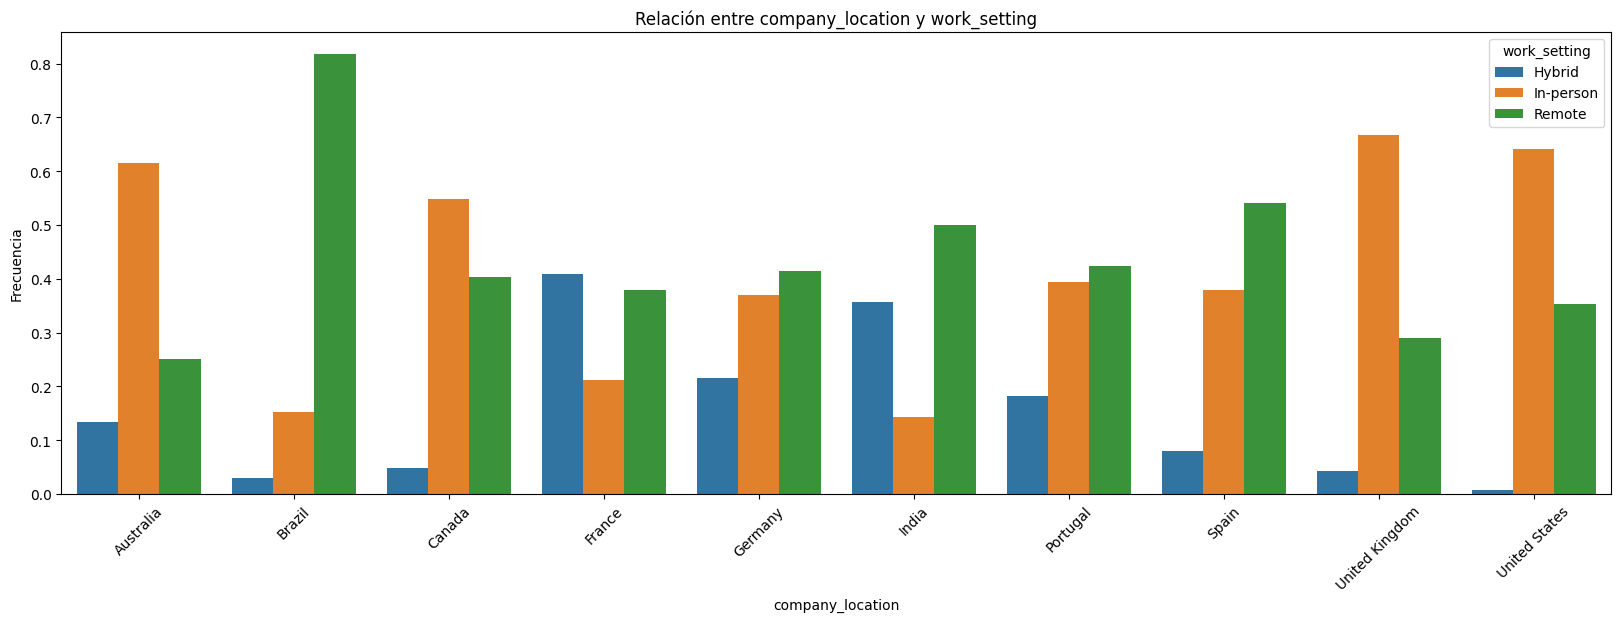

In [133]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_setting', relative_freq = True, size_group = 10)

In [134]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['work_setting'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 1477.8268427658052
P-Value: 2.7664800243595528e-303
Degrees of Freedom: 18
Expected Frequency Table:
 [[1.07890600e+00 3.24271194e+01 1.84939746e+01]
 [6.84690349e-01 2.05787488e+01 1.17365608e+01]
 [7.80132034e+00 2.34473017e+02 1.33725663e+02]
 [1.36938070e+00 4.11574976e+01 2.34731217e+01]
 [2.30304936e+00 6.92194279e+01 3.94775228e+01]
 [1.74284816e+00 5.23822697e+01 2.98748821e+01]
 [6.84690349e-01 2.05787488e+01 1.17365608e+01]
 [1.80509274e+00 5.42530651e+01 3.09418422e+01]
 [1.26771456e+01 3.81018652e+02 2.17304202e+02]
 [1.67852876e+02 5.04491145e+03 2.87723567e+03]]


<font color='yellow'>

- In almost all countries, the most sought-after jobs are either face-to-face or online, with a hybrid format being more rare.

</font>

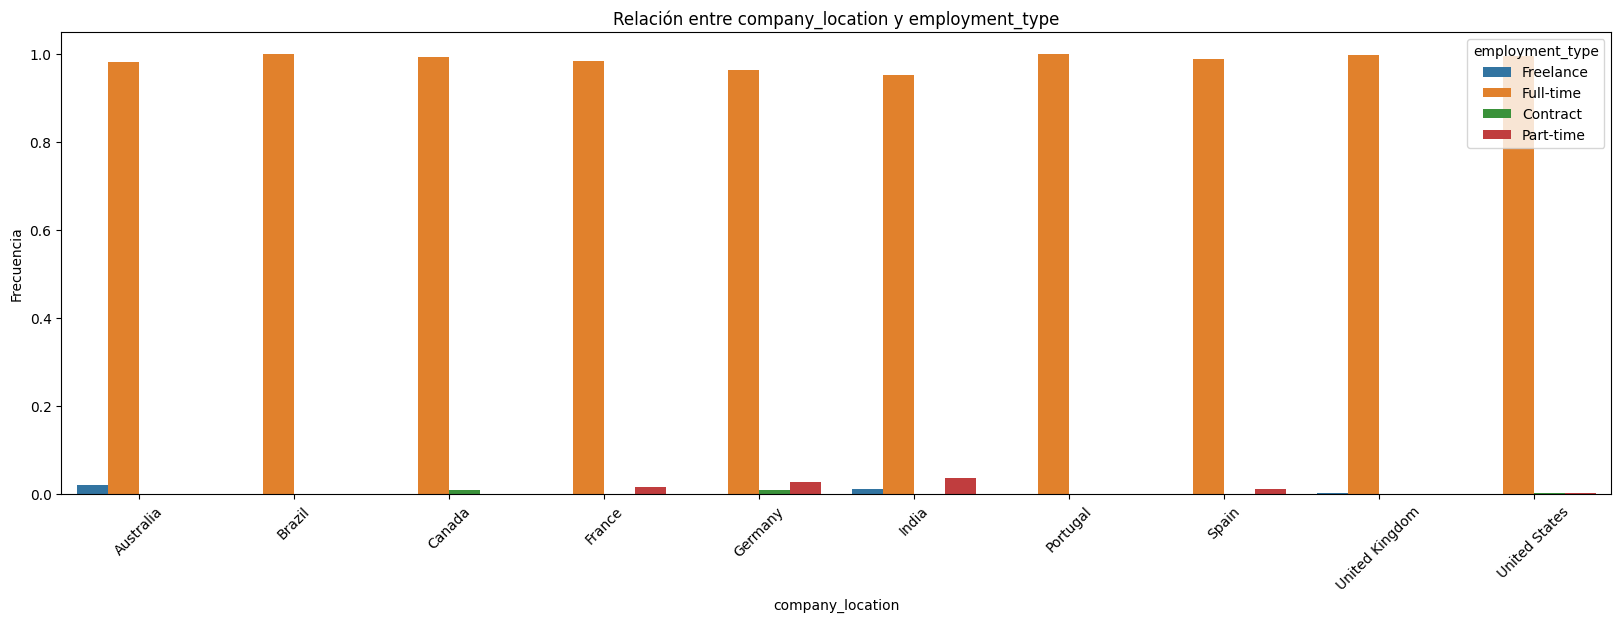

In [135]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'employment_type', relative_freq = True, size_group = 10)

In [136]:
contingency_table = pd.crosstab(count_data_loc['company_location'], df_combined['employment_type'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Cuadrado value:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Chi-Cuadrado value: 105.1310336598604
P-Value: 3.6431219624136526e-11
Degrees of Freedom: 27
Expected Frequency Table:
 [[1.19878445e-01 4.90411820e-02 5.16839568e+01 1.47123546e-01]
 [7.60767054e-02 3.11222886e-02 3.27994341e+01 9.33668658e-02]
 [8.66813371e-01 3.54605470e-01 3.73714765e+02 1.06381641e+00]
 [1.52153411e-01 6.22445772e-02 6.55988683e+01 1.86733732e-01]
 [2.55894373e-01 1.04684062e-01 1.10325369e+02 3.14052185e-01]
 [1.93649796e-01 7.92203710e-02 8.34894687e+01 2.37661113e-01]
 [7.60767054e-02 3.11222886e-02 3.27994341e+01 9.33668658e-02]
 [2.00565860e-01 8.20496699e-02 8.64712355e+01 2.46149010e-01]
 [1.40857173e+00 5.76233889e-01 6.07286493e+02 1.72870167e+00]
 [1.86503196e+01 7.62967620e+00 8.04083098e+03 2.28890286e+01]]


<font color='yellow'>

- It can be said that full-time work predominates in all countries, accounting in virtually all cases for almost 100% of contracts.

</font>

In [137]:
# Group the data by 'company_location' and calculate the average wage
job_offers_data = df_combined['company_location'].value_counts().reset_index()
job_offers_data.columns = ['company_location', 'job_offers_count']

# Download the GeoJSON country file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Adjust country names
job_offers_data['company_location'] = job_offers_data['company_location'].replace({'United States': 'United States of America'})

# Create the map centred on an initial location
map = folium.Map(location = [0, 0], zoom_start = 2)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'Average salary in USD',
    data = salary_data,
    columns = ['company_location', 'salary_in_usd_w'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Average salary in USD'
).add_to(map)

# Add the layer of choropleths
folium.Choropleth(
    geo_data = geojson_data,
    name = 'Number of job offers',
    data = job_offers_data,
    columns = ['company_location', 'job_offers_count'],
    key_on = 'feature.properties.name',
    fill_color = 'OrRd',
    fill_opacity = 0.8,
    line_opacity = 0.2,
    legend_name = 'Number of job offers'
).add_to(map)

# Add control layer
folium.LayerControl().add_to(map)

# Save the map
map.save('../img/job_offers_map3.html')

map

#### 1.2.3.3. Analysis according to work year

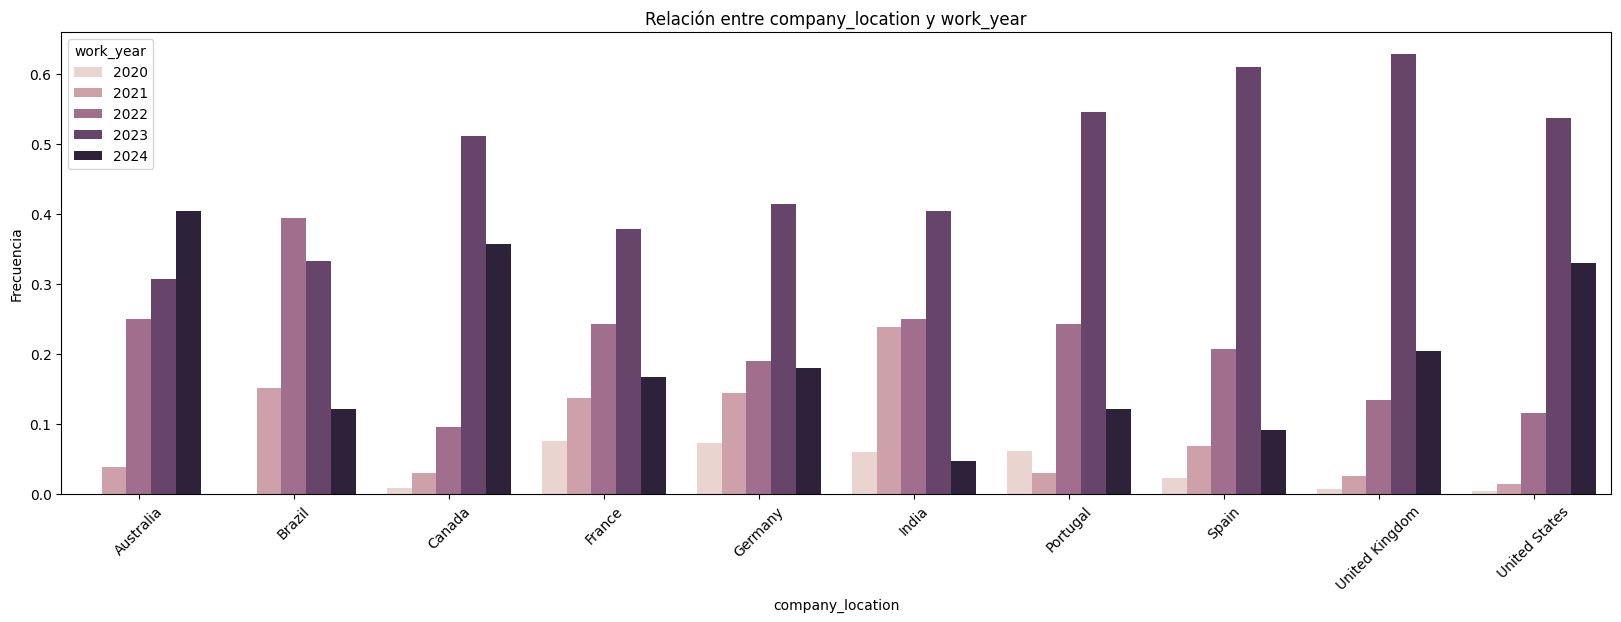

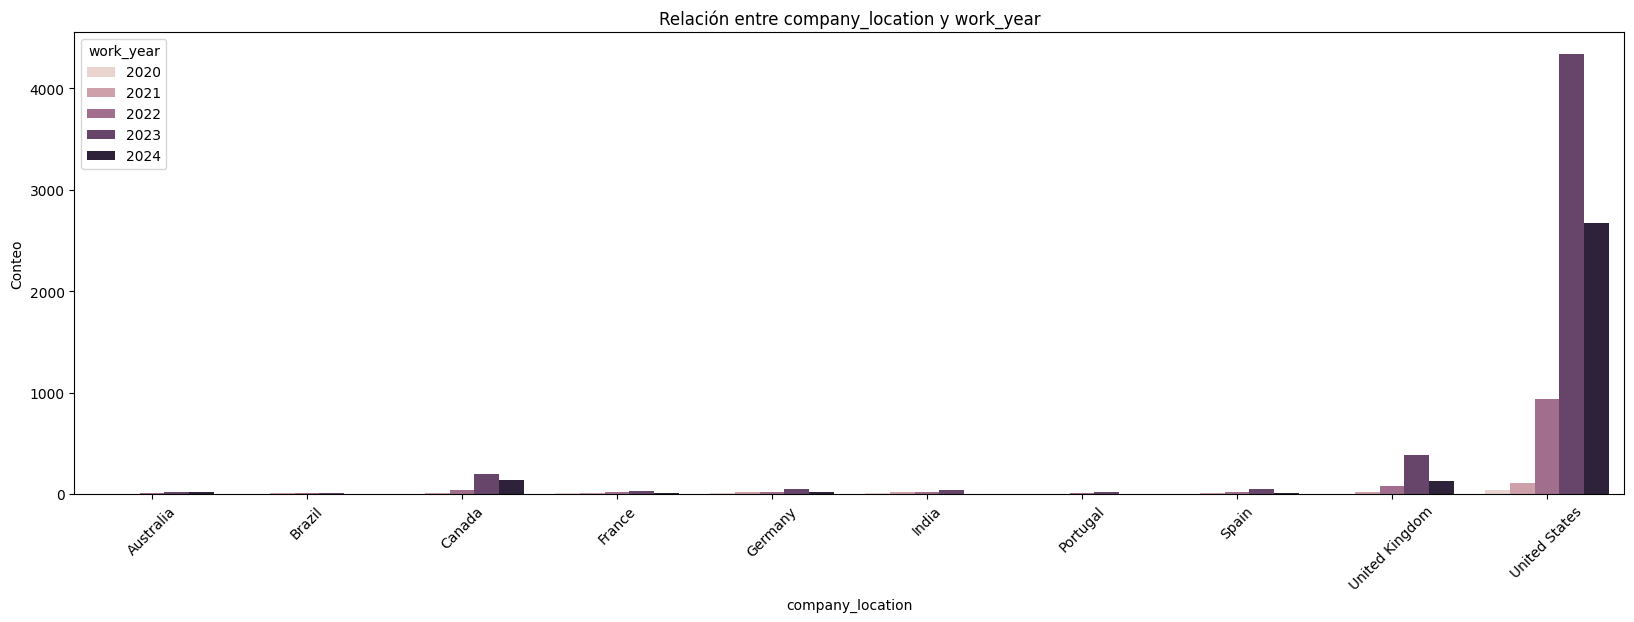

In [138]:
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_year', relative_freq = True, size_group = 10)
dpf.plot_categorical_relationship_fin(count_data_loc, cat_col1 = 'company_location', cat_col2 = 'work_year', size_group = 10)

In [139]:
# ANOVA

groups = df_combined['company_location'].unique() 
loc_for_year = [df_combined[df_combined['company_location'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*loc_for_year)
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 11.57145911715038
Valor p: 8.127161875468736e-140


<font color='yellow'>

- 2023 is undoubtedly the boom year for this type of employment. 2024 is on the right track in certain countries such as Australia, Canada and the United States, but lags far behind 2023 in the rest.

    - Does the fall of Silicon Valley Bank last year have anything to do with it?

</font>

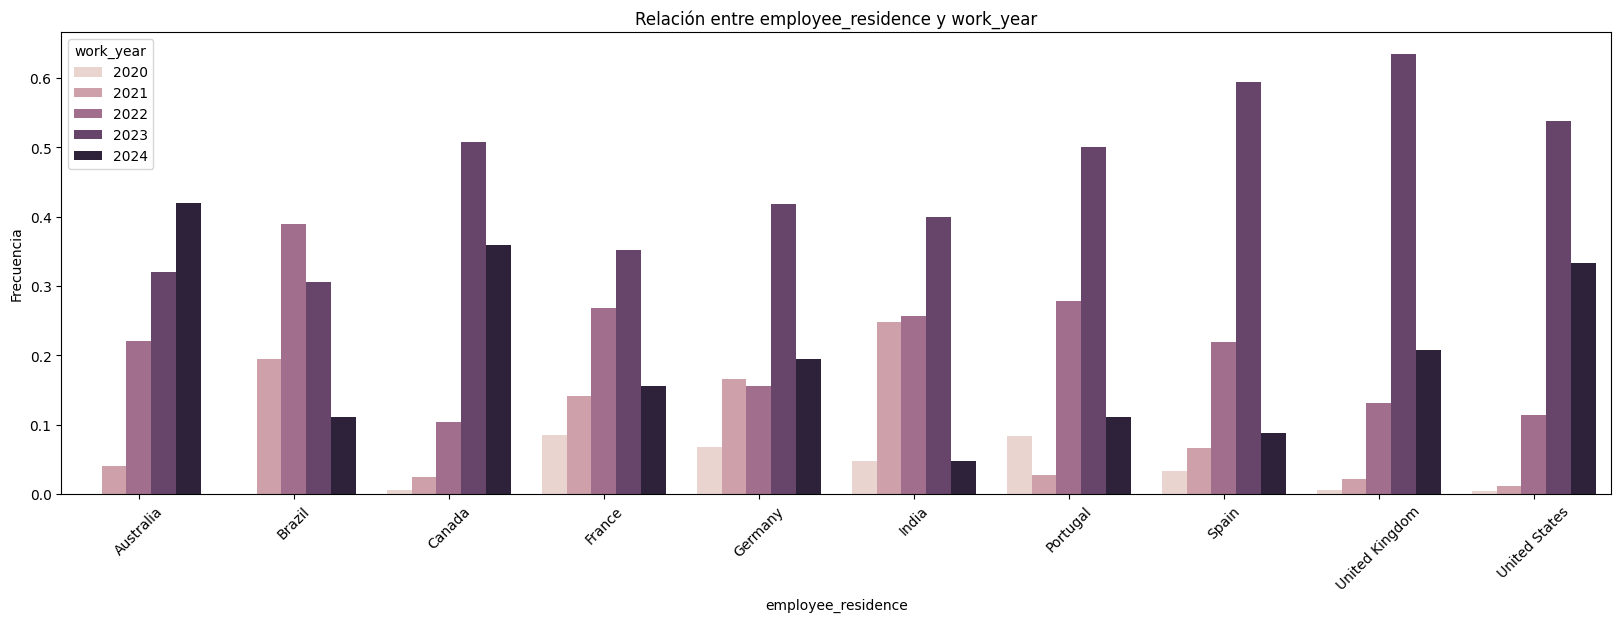

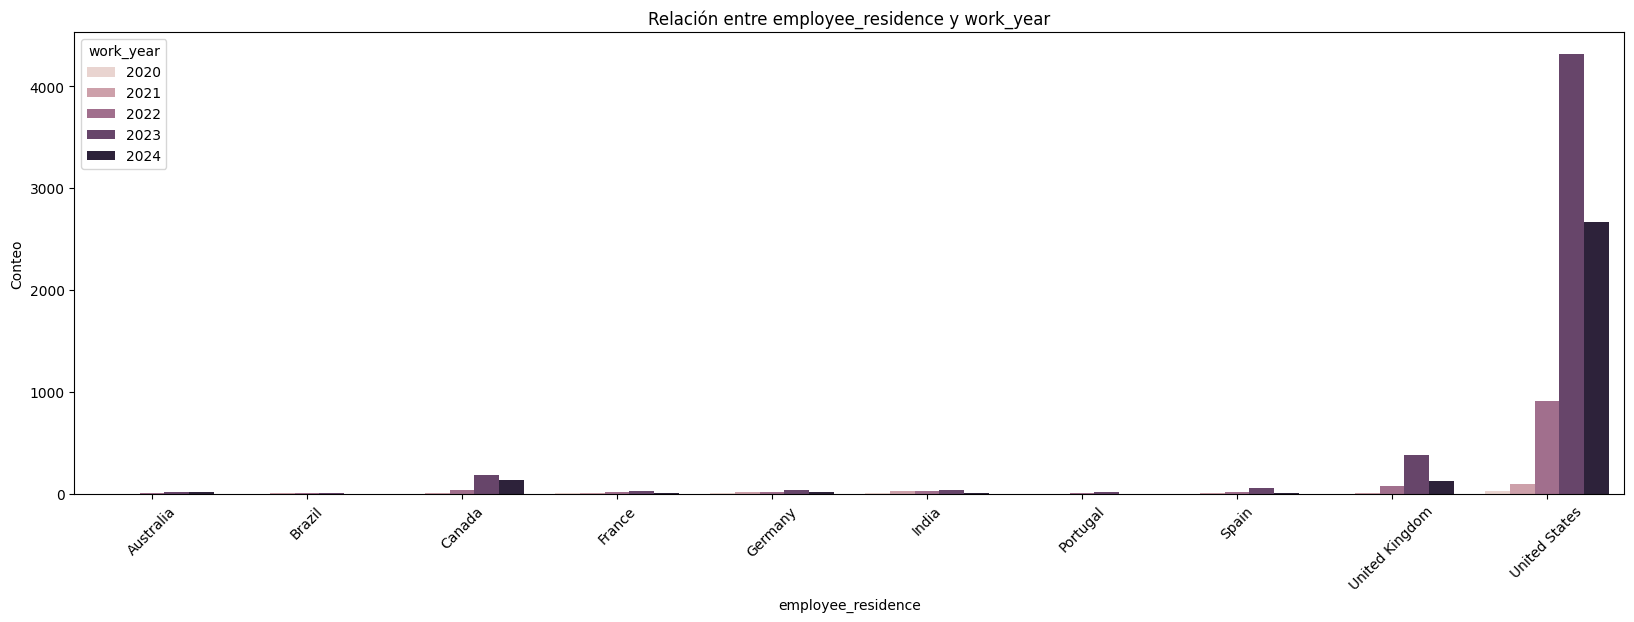

In [140]:
dpf.plot_categorical_relationship_fin(count_data_res, cat_col1 = 'employee_residence', cat_col2 = 'work_year', relative_freq = True, size_group = 10)
dpf.plot_categorical_relationship_fin(count_data_res, cat_col1 = 'employee_residence', cat_col2 = 'work_year', size_group = 10)

In [141]:
groups = df_combined['employee_residence'].unique() 
res_for_year = [df_combined[df_combined['employee_residence'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*res_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 13.42996145969176
P value: 1.8219987633661398e-182


<font color='yellow'>

- The place of residence of the workers is entirely consistent with the location of the headquarters of the companies. This will have a lot to do with the return to face-to-face work after Covid-19.

</font>

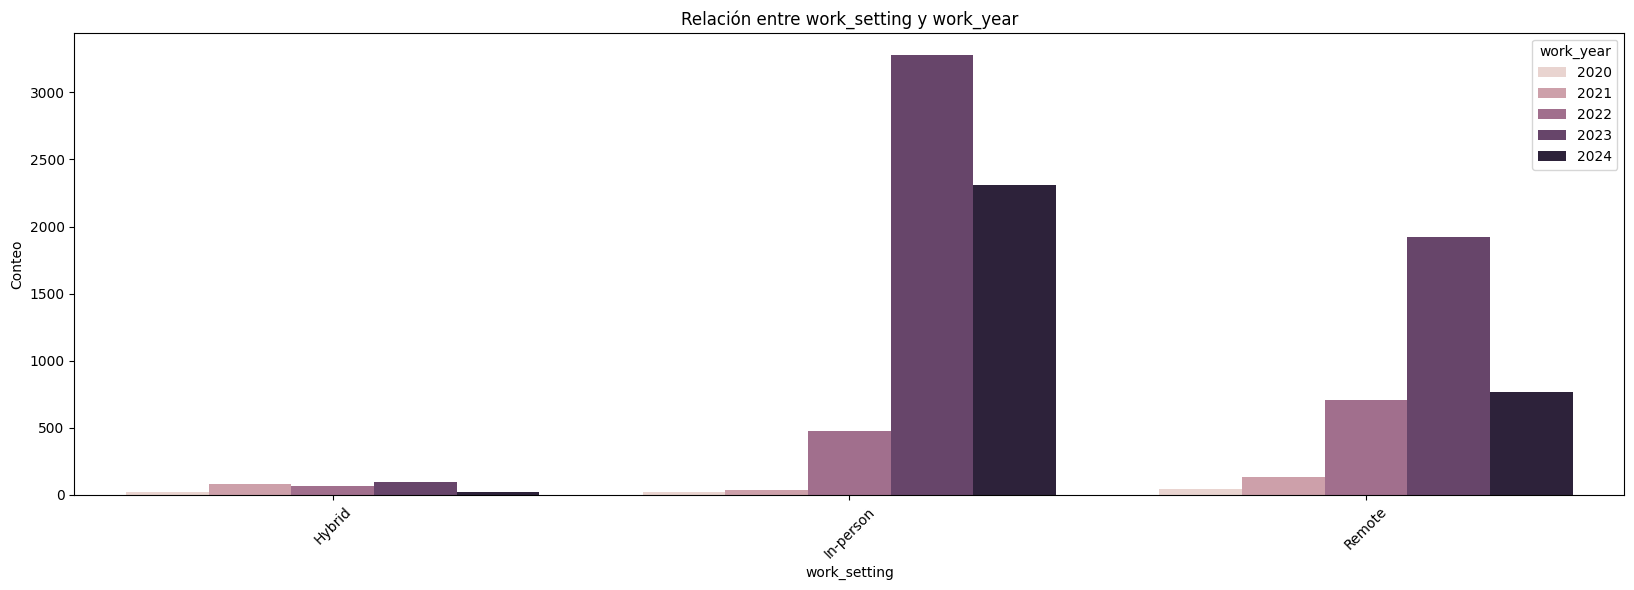

In [142]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'work_setting', cat_col2 = 'work_year', size_group = 10)

In [143]:
groups = df_combined['work_setting'].unique() 
ws_for_year = [df_combined[df_combined['work_setting'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*ws_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 617.7451480555538
P value: 1.2332952466427167e-253


<font color='yellow'>

- As anticipated in the graph above, in 2024, face-to-face work is coming back into vogue, with remote work following closely behind, and hybrid work lagging far behind.

- We assume that the companies that used the hybrid mode during Covis-19 have opted to return 100% to the face-to-face mode, or to opt definitively for remote work.

</font>

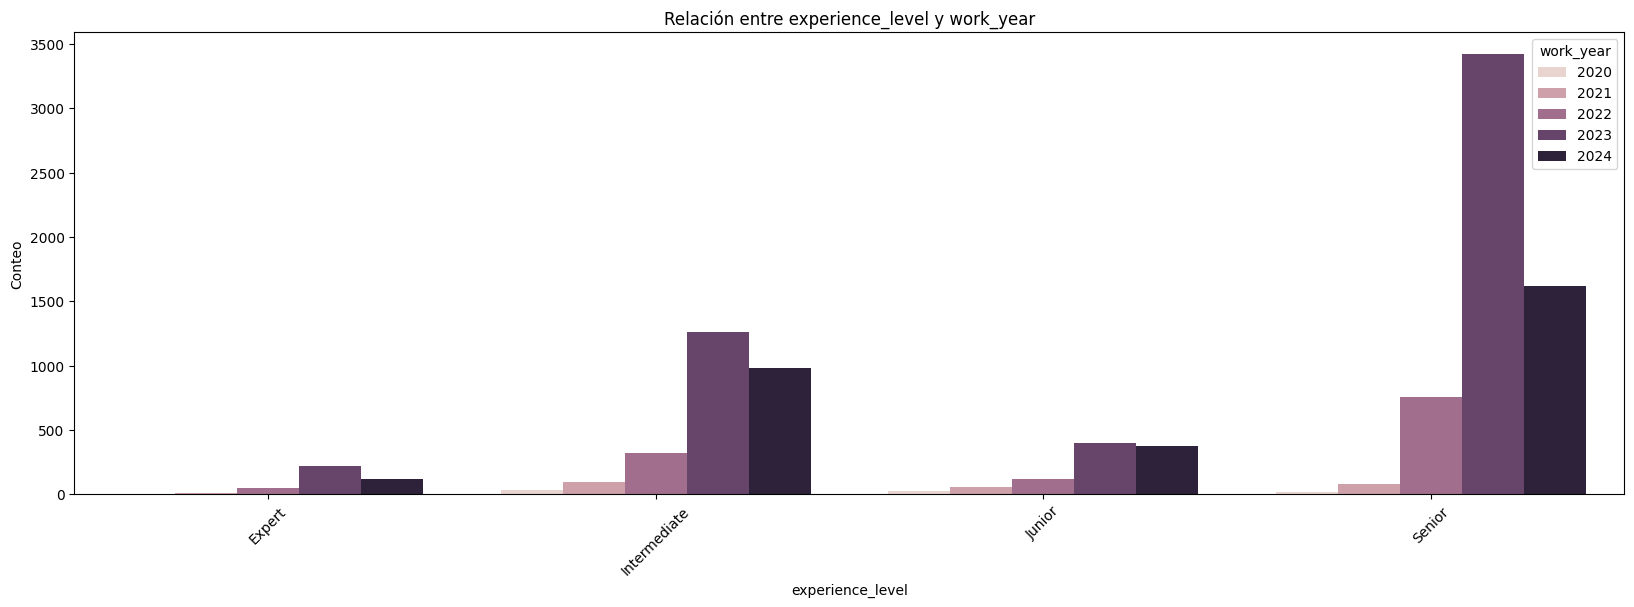

In [144]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'experience_level', cat_col2 = 'work_year', size_group = 10)

In [145]:
groups = df_combined['experience_level'].unique() 
el_for_year = [df_combined[df_combined['experience_level'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*el_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 2.567151367586863
P value: 0.052663002487709776


<font color='yellow'>
According to this test, we cannot be sure that the response and the CLV are related. The reaffirms our visual confirmation, but does not confirm.
</font>

<font color='yellow'>

- More and more junior or intermediate profiles are in demand, perhaps with the intention of training this person and helping him or her to grow within the company with a view to the future. Even so, the most in-demand profile is the Senior and far behind the ‘Expert’, perhaps also because a very specific profile will be required that is difficult to find.

</font>

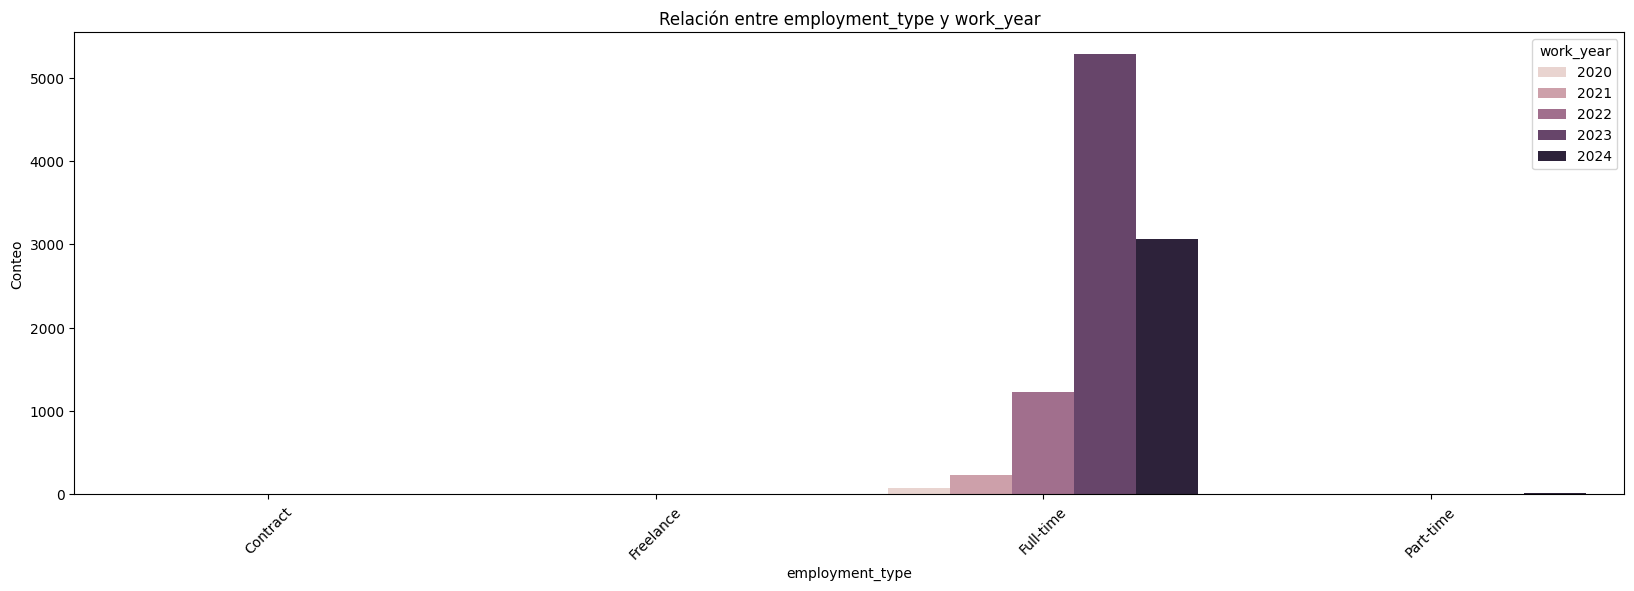

In [146]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'employment_type', cat_col2 = 'work_year', size_group = 10)

In [147]:
groups = df_combined['employment_type'].unique() 
et_for_year = [df_combined[df_combined['employment_type'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*et_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 31.87696119230221
P value: 1.6893330595949024e-20


<font color='yellow'>

- Practically the total percentage in all years of the contract type is ‘Full-time’.

</font>

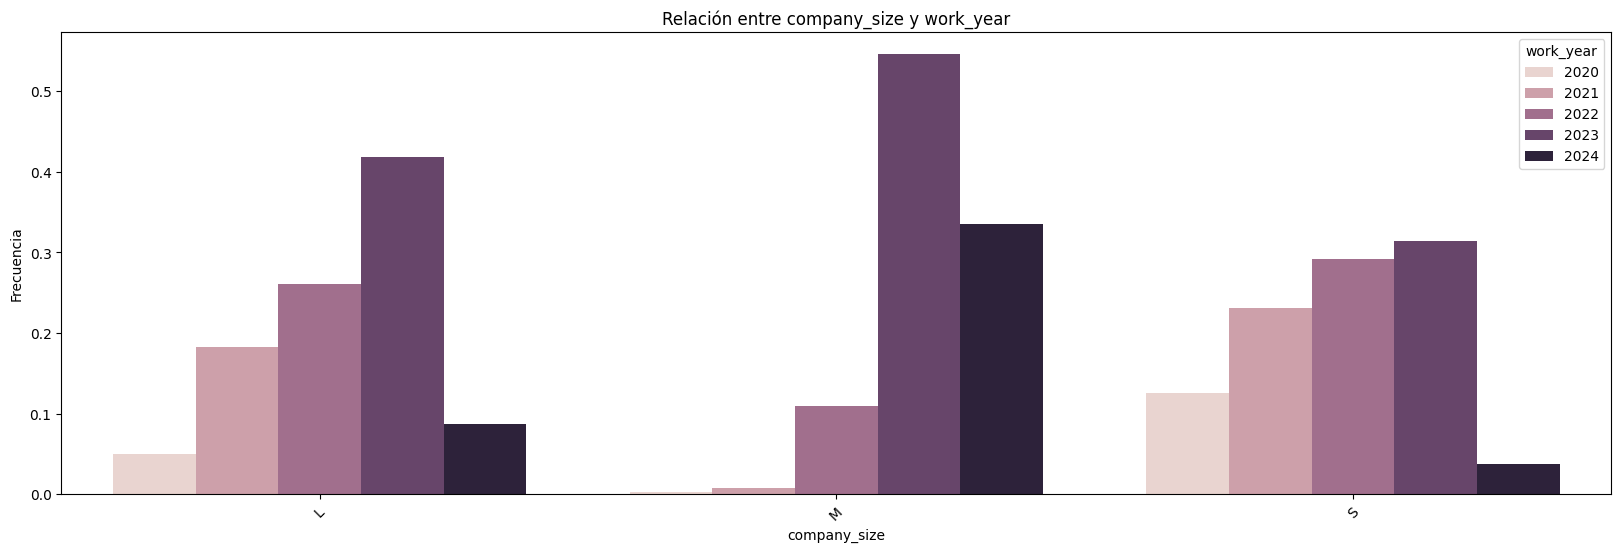

In [148]:
dpf.plot_categorical_relationship_fin(df_combined, cat_col1 = 'company_size', cat_col2 = 'work_year', relative_freq = True, size_group = 10)

In [149]:
groups = df_combined['company_size'].unique() 
cs_for_year = [df_combined[df_combined['company_size'] == group]['work_year'] for group in groups]

f_val, p_val = stats.f_oneway(*cs_for_year)
print("F value:", f_val)
print("P value:", p_val)

F value: 842.5243648454514
P value: 0.0


<font color='yellow'>

- This sector is growing strongly in the medium-sized company market, with a big difference compared to large and small companies, perhaps the ones that have suffered most from the effects of the fall of the Silicon Valley Bank of 2023.

</font>

## 1.3. Final conclusions (for the moment):

1. **Profiles in demand**:

- Data Engineer and Data Scientist with experience of at least 5 years (Senior) are the most in demand.

2. **Job offer by country**:

- The United States is the country with the most job offers in the data environment.

3. **Work modality**:

- Most jobs are full-time and face-to-face, followed by remote work. Hybrid work is less common.   

4. **Company size**:

- Medium-sized companies (50-250 employees) have the highest demand for this type of employee and also pay the best on average.

5. **Growth in demand**:

- Demand for jobs in the data environment has grown exponentially since 2020, possibly influenced by events such as Covid-19 and the collapse of Silicon Valley Bank in 2023.

6. **General salaries**:

- Most jobs offer salaries between $80k and $180k per year.
Analytincs Engineering Manager in Cloud and Database with more than 10 years of experience receive the highest salaries.

7. **International salary comparison**:

- Israel and Qatar have the highest median salaries, hovering around $300k.
The United States, Puerto Rico and New Zealand offer median salaries around $155k.

- Salaries in Israel have a large variability, while Qatar shows high salaries with less dispersion, possibly due to low labour supply.

- Other countries with medium-high salaries include Australia and Saudi Arabia.

8. **Wages by residence and mode of work**:

- Employees who work 100% face-to-face or remotely have higher median wages than those with a hybrid job type.

- Full-time jobs are better paid on average compared to freelance jobs.

9. **Wage growth**:

- The average wage has increased by almost 60% from 2020 to today.

10. **Demand vs Residency**:

- Over time, there has been a discrepancy between the 10 countries with the highest number of companies demanding data jobs and the 10 countries where the most employees engaged in these jobs live. This may be due to companies' strategy of hiring in countries with lower cost of living or to the mobility of employees to cheaper countries.

- However, this year 2024 the residence of workers does coincide more closely with the location of companies' headquarters, probably due to the return to face-to-face work post-Covid.

11. **Highest paid areas and job categories**:

- Machine Learning and AI, Data Science and Research, and Leadership and Management offer the highest salaries.

- The Data Analysis and Data Quality and Operations categories tend to offer lower salaries.

- The Cloud and Database category shows good average compensation with low variability in salaries.

12. **Demand by country and company size**:

- In most countries, the most in-demand job categories are Data Science and Research, Data Engineering, Machine Learning and AI, and Data Analysis.

- Medium-sized companies are the most in demand for these types of employees, except in India.

- The most demanded profiles in almost all countries are junior to senior (6 to 10 years of experience), with less demand for expert profiles.

13. **Impact of the fall of Silicon Valley Bank**:

- 2023 had the biggest boom in jobs in this sector, with 2024 showing growth in countries such as Australia, Canada and the United States, but little growth or even decline in supply in the rest. The fall of Silicon Valley Bank in 2023 may have played a role.


## 1.4. Evaluation of the Hypothesis: 'The United States is the best country to work in the data environment'.

The hypothesis that the United States is the best country to work in the data environment is evident but not conclusive based on these findings:

- **Pros**:

    - The United States has the **largest labour supply** in the data environment.
    - It offers high median **salaries ($155k)** and a relatively even wage distribution.
    - There is **exponential growth in demand** for these jobs from 2020.

- **Cons**:

    - Countries such as **Israel** and **Qatar** have higher median salaries **(around $300k)**.
    - Other countries also offer competitive salaries and may have **lower living costs**.
    - The mode of work in the US is mostly face-to-face, which could be a disadvantage compared to the flexibility in other countries.


**Therefore, while the US is a prominent place to work in the data environment due to high labour supply and good salaries, other countries may offer superior salary conditions, which makes the statement true but nuanced.**

# 2. Second part

In [150]:
# Loads the DataFrame we are going to work with.
df4 = pd.read_csv("../data/5_glassdoor_jobs.csv")

## 2.1. Data cleansing

### 2.1. Dataset isualisation

##### DF4

In [151]:
print(df4.info()) # Shows if there are nulls and the type of data in each column
df4.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB
None


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### 2.2. DataFrame adaptation

I make some modifications to the DataFrame.

First of all, I think about the columns I am interested in.

#### DF4

In [152]:
# Modify the columns that I think are convenient for a better understanding and create new ones.

# Delete column 'Unnamed: 0'
df4.drop('Unnamed: 0', axis = 1, inplace = True)


# Rename column 'Job Title'
df4.rename(columns = {'Job Tiltle': 'Job_title'}, inplace = True)

In [153]:
df4['Salary Estimate'].value_counts()

Salary Estimate
-1                                  214
$21-$34 Per Hour(Glassdoor est.)      6
$49K-$113K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$86K-$143K (Glassdoor est.)           6
                                   ... 
$105K-$173K (Glassdoor est.)          1
$46K-$85K (Glassdoor est.)            1
$71K-$134K (Glassdoor est.)           1
$102K-$190K (Glassdoor est.)          1
$27-$47 Per Hour(Glassdoor est.)      1
Name: count, Length: 417, dtype: int64

In [154]:
# Edit column 'Salary Estimate'

# Function to convert salary to an annual figure
def convert_to_annual_salary(salary_str):
    salary_str = salary_str.strip()
    
    # Delete '(Glassdoor est.)' if present
    if '(Glassdoor est.)' in salary_str:
        salary_str = salary_str.replace('(Glassdoor est.)', '')
        return salary_str
    
    # If it is a special value (-1), we return NaN
    if salary_str == '-1':
        return np.nan

    # Handling hourly estimates
    if 'Per Hour' in salary_str:
        try:
            low, high = salary_str.split('$')[1].split('-')
            low = float(low.strip().replace(',', ''))
            high = float(high.strip().replace(',', ''))
            # Convert to annual salary
            return ((low + high) / 2) * 2080  # 2080 hours in a working year
        except:
            return np.nan

# Apply the function to the DataFrame
df4['Salary'] = df4['Salary Estimate'].apply(convert_to_annual_salary)

df4.Salary.value_counts()

Salary
$86K-$143K          6
$21-$34 Per Hour    6
$54K-$115K          6
$49K-$113K          6
$81K-$167K          5
                   ..
$171K-$272K         1
$136K-$208K         1
$57K-$109K          1
$74K-$137K          1
$72K-$142K          1
Name: count, Length: 400, dtype: int64

In [155]:
def convert_to_annual_mean(salary_range):
    if pd.isna(salary_range):
        return None
    
    try:
        # Identify whether hourly or annual
        if 'Per Hour' in salary_range:
            # Remove the word 'Per Hour' and split the range
            salary_range = salary_range.replace(' Per Hour', '')
            low, high = salary_range.split('-')
            # Convert to numerical values
            low = float(low.replace('$', ''))
            high = float(high.replace('$', ''))
            # Calculate the average hourly wage
            mean_hourly = (low + high) / 2
            # Convert to annual salary (we assume 40 hours per week and 52 weeks per year)
            annual_mean = mean_hourly * 40 * 52
        else:
            # Split the range
            low, high = salary_range.split('-')
            # Convert to numerical values
            low = float(low.replace('$', '').replace('K', '000'))
            high = float(high.replace('$', '').replace('K', '000'))
            # Calculate the average annual salary
            annual_mean = (low + high) / 2
        
        return round(int(annual_mean), 0)
    
    except Exception as e:
        print(f"Error processing salary range '{salary_range}': {e}")
        return None

# Apply the function to each row of the DataFrame
df4['Average_salary'] = df4['Salary'].apply(convert_to_annual_mean)

In [156]:
# Delete rows with NaN values in the column 'Average_salary'
df4.dropna(subset = ['Average_salary'], inplace = True)
df4.Average_salary.info()

<class 'pandas.core.series.Series'>
Index: 713 entries, 0 to 955
Series name: Average_salary
Non-Null Count  Dtype  
--------------  -----  
713 non-null    float64
dtypes: float64(1)
memory usage: 11.1 KB


In [157]:
# Create column 'Satate'

# Dictionary for mapping state abbreviations to their full names
state_abbreviations = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Mapping states to regions
regions = {
    'Northeast': ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT'],
    'Southeast': ['AL', 'FL', 'GA', 'KY', 'MS', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AZ', 'NM', 'OK', 'TX'],
    'West': ['CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY']
}

region_mapping = {state: region for region, states in regions.items() for state in states}

# Extract abbreviations from the column 'Location'
def extract_state(location):
    parts = location.split(', ')
    if len(parts) > 1:
        return parts[1]
    return None

df4['State Abbreviation'] = df4['Location'].apply(extract_state)
df4['State'] = df4['State Abbreviation'].map(state_abbreviations)

# Assign regions to states
df4['Region'] = df4['State Abbreviation'].map(region_mapping)
df4.drop('State Abbreviation', axis = 1, inplace = True)

df4.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary,Average_salary,State,Region
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,$53K-$91K,72000.0,New Mexico,Southwest
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,$63K-$112K,87500.0,Maryland,NaN
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,$80K-$90K,85000.0,Florida,Southeast
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",$56K-$97K,76500.0,Washington,West
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$86K-$143K,114500.0,New York,Northeast


In [158]:
df4.Size.value_counts()

Size
1001 to 5000 employees     145
501 to 1000 employees      130
10000+ employees           130
201 to 500 employees       116
51 to 200 employees         87
5001 to 10000 employees     76
1 to 50 employees           28
Unknown                      1
Name: count, dtype: int64

In [159]:
# Define a function to classify the size in categories
def categorize_size(size):
    if '10000+' in size or '5001 to 10000' in size:
        return 'L'  # Large
    elif '1 to 50' in size or '51 to 200' in size:
        return 'S'  # Small
    elif '201 to 500' in size or '501 to 1000' in size or '1001 to 5000' in size:
        return 'M'  # Medium
    else:
        return 'Unknown'

df4['Size_cat'] = df4['Size'].apply(categorize_size)
df4.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary,Average_salary,State,Region,Size_cat
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,$53K-$91K,72000.0,New Mexico,Southwest,M
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,$63K-$112K,87500.0,Maryland,NaN,L
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,$80K-$90K,85000.0,Florida,Southeast,M
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",$56K-$97K,76500.0,Washington,West,S
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$86K-$143K,114500.0,New York,Northeast,S


In [160]:
df4['Job Title'].value_counts()

Job Title
Data Scientist                                                       128
Data Engineer                                                         51
Senior Data Scientist                                                 30
Data Analyst                                                          15
Senior Data Engineer                                                  14
                                                                    ... 
Data Scientist (Warehouse Automation)                                  1
Jr. Data Scientist                                                     1
Data Architect / Data Modeler                                          1
Associate Scientist / Sr. Associate Scientist, Antibody Discovery      1
Machine Learning Engineer (NLP)                                        1
Name: count, Length: 254, dtype: int64

In [161]:
def classify_job_title(title): # Sort 'job_category' according to the column 'Job Title'
    
    title = title.lower() # Convert title to lowercase to make search case insensitive
    
    # Specific categories based on title patterns
    if re.search(r'\bdata scientist\b|\bdata science\b|\bresearch\b', title):
        return 'Data Science and Research'
    elif re.search(r'\bmachine learning\b|\bml\b|\bai\b|\bdeep learning\b', title):
        return 'Machine Learning and AI'
    elif re.search(r'\bbi\b|\bvisualization\b|\breporting\b|\bpower bi\b', title):
        return 'BI and Visualization'
    elif re.search(r'\bdata engineer\b|\bengineer\b|\bengineering\b|\bdata platform\b', title):
        return 'Data Engineering'
    elif re.search(r'\bdata analysis\b|\bdata analyst\b|\banalyst\b|\banalyst\b|\banalysis\b', title):
        return 'Data Analysis'
    elif re.search(r'\bcloud\b|\bdatabase\b|\bdevops\b|\baws\b|\bazure\b', title):
        return 'Cloud and Database'
    elif re.search(r'\bleadership\b|\bmanager\b|\bmanagement\b|\bdirector\b', title):
        return 'Leadership and Management'
    elif re.search(r'\bdata quality\b|\boperations\b|\bdata governance\b', title):
        return 'Data Quality and Operations'
    elif re.search(r'\bdata architecture\b||\bdata architect\b\bmodeling\b|\bdata modeller\b', title):
        return 'Data Architecture and Modeling'
    elif re.search(r'\bstrategy\b|\bdata management\b|\bdata strategy\b', title):
        return 'Data Management and Strategy'
    else:
        return 'Unknown'  # Default category if it does not match any

# Applies the function to fill the NaNs in job_category
df4['job_category'] = df4['Job Title'].apply(classify_job_title)

df4.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary,Average_salary,State,Region,Size_cat,job_category
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,$53K-$91K,72000.0,New Mexico,Southwest,M,Data Science and Research
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,$63K-$112K,87500.0,Maryland,NaN,L,Data Science and Research
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,$80K-$90K,85000.0,Florida,Southeast,M,Data Science and Research
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",$56K-$97K,76500.0,Washington,West,S,Data Science and Research
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$86K-$143K,114500.0,New York,Northeast,S,Data Science and Research


In [162]:
df4.Region.info()

<class 'pandas.core.series.Series'>
Index: 713 entries, 0 to 955
Series name: Region
Non-Null Count  Dtype 
--------------  ----- 
659 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [163]:
state_to_region = {
    'Alabama': 'south-east', 'Alaska': 'west', 'Arizona': 'south-west', 'Arkansas': 'south-east', 'California': 'west',
    'Colorado': 'west', 'Connecticut': 'north-east', 'Delaware': 'north-east', 'Florida': 'south-east', 'Georgia': 'south-east',
    'Hawaii': 'west', 'Idaho': 'west', 'Illinois': 'mid-west', 'Indiana': 'mid-west', 'Iowa': 'mid-west',
    'Kansas': 'mid-west', 'Kentucky': 'south-east', 'Louisiana': 'south-east', 'Maine': 'north-east', 'Maryland': 'north-east',
    'Massachusetts': 'north-east', 'Michigan': 'mid-west', 'Minnesota': 'mid-west', 'Mississippi': 'south-east',
    'Missouri': 'mid-west', 'Montana': 'west', 'Nebraska': 'mid-west', 'Nevada': 'west', 'New Hampshire': 'north-east',
    'New Jersey': 'north-east', 'New Mexico': 'south-west', 'New York': 'north-east', 'North Carolina': 'south-east',
    'North Dakota': 'mid-west', 'Ohio': 'mid-west', 'Oklahoma': 'south-west', 'Oregon': 'west', 'Pennsylvania': 'north-east',
    'Rhode Island': 'north-east', 'South Carolina': 'south-east', 'South Dakota': 'mid-west', 'Tennessee': 'south-east',
    'Texas': 'south-west', 'Utah': 'west', 'Vermont': 'north-east', 'Virginia': 'south-east', 'Washington': 'west',
    'West Virginia': 'south-east', 'Wisconsin': 'mid-west', 'Wyoming': 'west'
}

# Extract the state from the format 'City, State'
def extract_state(location):
    try:
        return location.split(', ')[1]
    except IndexError:
        return 'Unknown'

df4['State_abbr'] = df4['Location'].apply(extract_state)

# Convert state abbreviations to full names
df4['State'] = df4['State_abbr'].map(lambda abbr: state_abbreviations.get(abbr, 'Unknown'))

# Dividing states into regions
df4['Region'] = df4['State'].map(lambda state: state_to_region.get(state, 'Unknown'))

# Identify rows with 'Region' like 'Unknown'
unknown_region_df = df4[df4['Region'] == 'Unknown']

# Show the states that are generating 'Unknown'
print("Estados con regiones desconocidas:")
print(unknown_region_df[['State_abbr', 'State', 'Location']])

# List of unique states with unknown regions
unique_states_with_unknown_region = unknown_region_df['State'].unique()

# Manually adding regions for states that are giving 'Unknown'
manual_region_updates = {
    'Santa Fe Springs, Los Angeles': 'west',
    'Washington': 'west',
}

# Update the column 'Region' with the manual values
df4['Region'] = df4['State'].map(lambda state: manual_region_updates.get(state, state_to_region.get(state, 'Unknown')))

df4 = df4[df4['Region'] != 'Unknown']
df4.Region.value_counts()

Estados con regiones desconocidas:
      State_abbr    State                           Location
140           DC  Unknown                     Washington, DC
145  Los Angeles  Unknown  Santa Fe Springs, Los Angeles, CA
170           DC  Unknown                     Washington, DC
308           DC  Unknown                     Washington, DC
350           DC  Unknown                     Washington, DC
370           DC  Unknown                     Washington, DC
401           DC  Unknown                     Washington, DC
567           DC  Unknown                     Washington, DC
863           DC  Unknown                     Washington, DC


Region
north-east    261
west          193
south-east    115
mid-west       99
south-west     36
Name: count, dtype: int64

In [164]:
df4.Sector.value_counts()

Sector
Information Technology              168
Biotech & Pharmaceuticals           111
Business Services                    92
Insurance                            69
Health Care                          46
Finance                              42
Manufacturing                        33
Aerospace & Defense                  25
Education                            21
Retail                               15
Oil, Gas, Energy & Utilities         14
Government                           11
Non-Profit                            9
Travel & Tourism                      8
Transportation & Logistics            8
Telecommunications                    6
Media                                 6
Real Estate                           5
Consumer Services                     4
Arts, Entertainment & Recreation      4
Mining & Metals                       3
-1                                    2
Agriculture & Forestry                1
Accounting & Legal                    1
Name: count, dtype: int64

In [165]:
df4['Sector'] = df4['Sector'].replace(-1, 'Unknown')

In [166]:
# Check for duplicate rows
duplicates = sum(df4.duplicated())
print(f'There are {duplicates} duplicate rows')

# Remove duplicate rows
df4.drop_duplicates(inplace = True)

There are 262 duplicate rows


In [167]:
# Verify that there are no more nulls and how the DataFrame looks like after cleaning it.
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 0 to 948
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          442 non-null    object 
 1   Salary Estimate    442 non-null    object 
 2   Job Description    442 non-null    object 
 3   Rating             442 non-null    float64
 4   Company Name       442 non-null    object 
 5   Location           442 non-null    object 
 6   Headquarters       442 non-null    object 
 7   Size               442 non-null    object 
 8   Founded            442 non-null    int64  
 9   Type of ownership  442 non-null    object 
 10  Industry           442 non-null    object 
 11  Sector             442 non-null    object 
 12  Revenue            442 non-null    object 
 13  Competitors        442 non-null    object 
 14  Salary             442 non-null    object 
 15  Average_salary     442 non-null    float64
 16  State              442 non-null

In [168]:
# Delete column 'Job Description'
df4.drop('Job Description', axis = 1, inplace = True)
df4

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary,Average_salary,State,Region,Size_cat,job_category,State_abbr
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,$53K-$91K,72000.0,New Mexico,south-west,M,Data Science and Research,NM
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,$63K-$112K,87500.0,Maryland,north-east,L,Data Science and Research,MD
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,$80K-$90K,85000.0,Florida,south-east,M,Data Science and Research,FL
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",$56K-$97K,76500.0,Washington,west,S,Data Science and Research,WA
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",$86K-$143K,114500.0,New York,north-east,S,Data Science and Research,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,Data Architect / Data Modeler,$63K-$110K (Glassdoor est.),4.3,Medidata Solutions\n4.3,"New York, NY","New York, NY",1001 to 5000 employees,1999,Company - Public,Enterprise Software & Network Solutions,Information Technology,$500 million to $1 billion (USD),Oracle,$63K-$110K,86500.0,New York,north-east,S,Data Architecture and Modeling,NY
901,Data Scientist,$65K-$113K (Glassdoor est.),3.4,"DatamanUSA, LLC\n3.4","Olympia, WA","Centennial, CO",51 to 200 employees,-1,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,$65K-$113K,89000.0,Washington,west,S,Data Science and Research,WA
928,"Associate Scientist / Sr. Associate Scientist,...",$59K-$125K (Glassdoor est.),4.0,23andMe\n4.0,"South San Francisco, CA","Sunnyvale, CA",501 to 1000 employees,2006,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Unknown / Non-Applicable,"Ancestry, Verily Life Sciences, Abbott Laborat...",$59K-$125K,92000.0,California,west,M,Data Architecture and Modeling,CA
945,Machine Learning Engineer (NLP),$80K-$142K (Glassdoor est.),4.1,CK-12 Foundation\n4.1,"Palo Alto, CA","Palo Alto, CA",1 to 50 employees,2007,Company - Private,K-12 Education,Education,Unknown / Non-Applicable,-1,$80K-$142K,111000.0,California,west,S,Machine Learning and AI,CA


In [169]:
df_combined.groupby(['job_category', 'job_title']).count()

experience_level  \
job_category            job_title                                               
BI and Visualization    BI Analyst                                         36   
                        BI Data Analyst                                    23   
                        BI Data Engineer                                    1   
                        BI Developer                                       57   
                        Business Intelligence Analyst                      50   
...                                                                       ...   
Machine Learning and AI Machine Learning Software Engineer                 16   
                        Machine Learning Specialist                         2   
                        NLP Engineer                                       12   
                        Principal Machine Learning Engineer                 3   
                        Staff Machine Learning Engineer                     1   

                                                             salary  \
job_category            job_title                                     
BI and Visualization    BI Analyst                               36   
                        BI Data Analyst                          23   
                        BI Data Engineer                          1   
                        BI Developer                             57   
                        Business Intelligence Analyst            50   
...                                                             ...   
Machine Learning and AI Machine Learning Software Engineer       16   
                        Machine Learning Specialist               2   
                        NLP Engineer                             12   
                        Principal Machine Learning Engineer       3   
                        Staff Machine Learning Engineer           1   

                                                             salary_currency  \
job_category            job_title                                              
BI and Visualization    BI Analyst                                        36   
                        BI Data Analyst                                   23   
                        BI Data Engineer                                   1   
                        BI Developer                                      57   
                        Business Intelligence Analyst                     50   
...                                                                      ...   
Machine Learning and AI Machine Learning Software Engineer                16   
                        Machine Learning Specialist                        2   
                        NLP Engineer                                      12   
                        Principal Machine Learning Engineer                3   
                        Staff Machine Learning Engineer                    1   

                                                             salary_in_usd  \
job_category            job_title                                            
BI and Visualization    BI Analyst                                      36   
                        BI Data Analyst                                 23   
                        BI Data Engineer                                 1   
                        BI Developer                                    57   
                        Business Intelligence Analyst                   50   
...                                                                    ...   
Machine Learning and AI Machine Learning Software Engineer              16   
                        Machine Learning Specialist                      2   
                        NLP Engineer                                    12   
                        Principal Machine Learning Engineer              3   
                        Staff Machine Learning Engineer                  1   

                           

In [170]:
df_combined.to_csv('../data/data_jobs.csv', sep = ',', index = False, encoding = 'utf-8')